In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
shopping_df = pd.read_csv("shopping_behavior_updated.csv")

In [90]:
shopping_df.dtypes

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

In [91]:
cat = shopping_df.select_dtypes("object").columns
num = shopping_df.select_dtypes(exclude= 'object').columns

In [92]:
cat

Index(['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color',
       'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [93]:
num

Index(['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating',
       'Previous Purchases'],
      dtype='object')

In [94]:
shopping_df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


# null value analysis

# for catagorical data

In [95]:
shopping_df['Gender'].isnull().sum()

np.int64(0)

In [96]:
for i in cat:
    null = shopping_df[i].isnull().sum()
    print(i , null)

Gender 0
Item Purchased 0
Category 0
Location 0
Size 0
Color 0
Season 0
Subscription Status 0
Shipping Type 0
Discount Applied 0
Promo Code Used 0
Payment Method 0
Frequency of Purchases 0


# for numerrical analysis

In [97]:
num

Index(['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating',
       'Previous Purchases'],
      dtype='object')

In [98]:
shopping_df["Customer ID"].isnull().sum()

np.int64(0)

In [99]:
for i in num:
    null = shopping_df[i].isnull().sum()
    print(i , null)

Customer ID 0
Age 0
Purchase Amount (USD) 0
Review Rating 0
Previous Purchases 0


# preprocessing data

# for catagorical data

In [100]:
cat

Index(['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color',
       'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [101]:
shopping_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [102]:
g = {}
for i in cat:
    if i not in g:
        g[i] = []
        
    g[i] = shopping_df[i].unique()

# drop the unwanted columns

In [103]:
shopping_df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [104]:
shopping_df.drop(columns= ["Customer ID"] , inplace= True)

In [105]:
shopping_df

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


# catagorocal analysis

In [106]:
keys = shopping_df['Gender'].value_counts().keys().tolist()
values = shopping_df['Gender'].value_counts().values.tolist()
keys

['Male', 'Female']

In [107]:
values

[2652, 1248]

# data frame

In [108]:
df = pd.DataFrame(data = zip(keys , values) , columns= ["gender" , "population"])
df

,gender,population
0,Male,2652
1,Female,1248


# barcharts

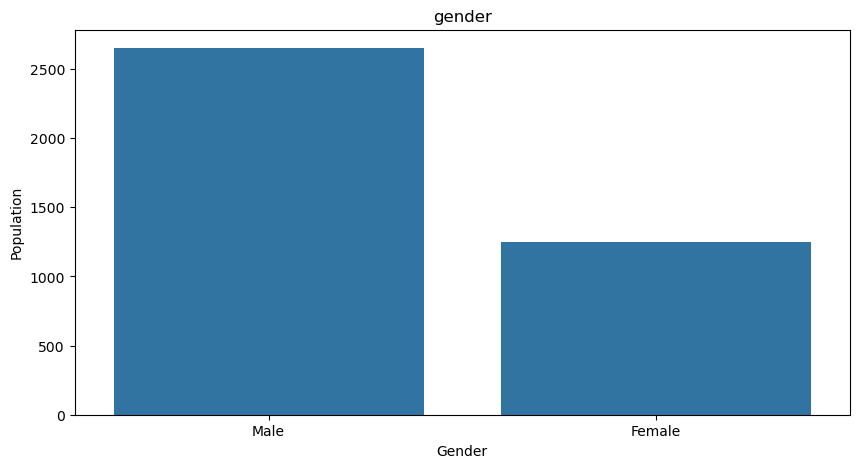

In [109]:
plt.figure(figsize=(10,5))
sns.barplot(x= keys , y= values)
plt.title("gender")
plt.xlabel("Gender")
plt.ylabel("Population")
plt.show()

# piecharts

In [110]:
keys = shopping_df['Gender'].value_counts().keys().tolist()
values = shopping_df['Gender'].value_counts().values.tolist()

In [111]:
keys

['Male', 'Female']

In [112]:
values

[2652, 1248]

([<matplotlib.patches.Wedge at 0x277fca48050>,
 [Text(-0.6429923108322626, 1.0131934110576257, 'Male'),
  Text(0.6429923994084449, -1.0131933548454466, 'Female')],
 [Text(-0.3750788479854865, 0.591029489783615, '68.00%'),
  Text(0.3750788996549262, -0.5910294569931771, '32.00%')])

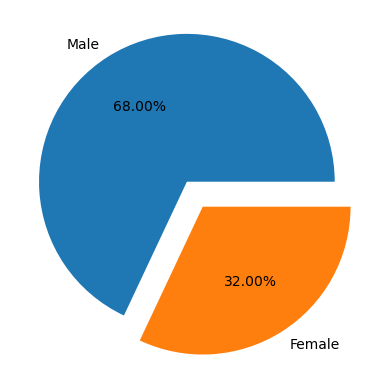

In [113]:
plt.pie(x= values , labels= keys , autopct="%0.2f%%" , explode= [0.1]* len(keys))

In [114]:
cat

Index(['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color',
       'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Payment Method', 'Frequency of Purchases'],
      dtype='object')

# data frames for all catogories

In [115]:
import os
for i in cat:
    keys = shopping_df[i].value_counts().keys().tolist()
    values = shopping_df[i].value_counts().values.tolist()
    
    df = pd.DataFrame(data= zip(keys ,  values) , columns= [ i  , "population"])

    folder = "shopping data dataframes"
    os.makedirs(folder , exist_ok= True)

    cwd = os.getcwd()
    new_cwd = os.path.join(cwd , folder)

    file = f"{i}.csv"
    path = os.path.join(new_cwd , file)

    df.to_csv(path, index= False)



# pie for catagorical

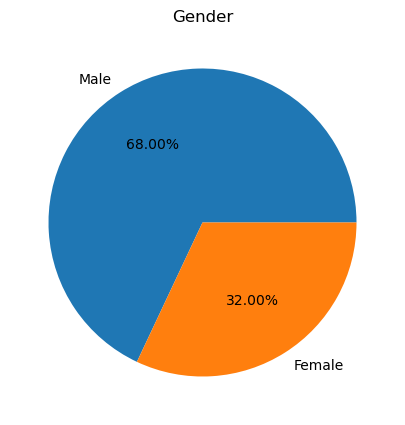

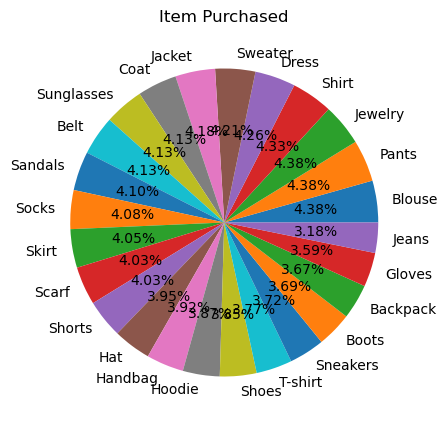

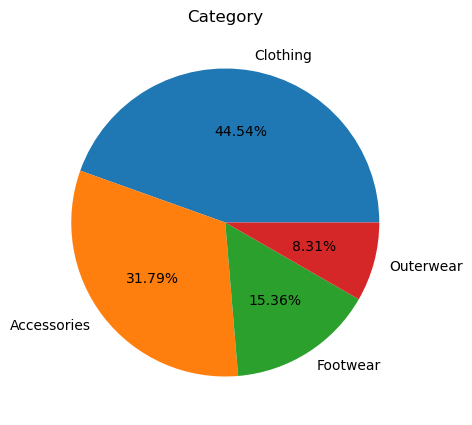

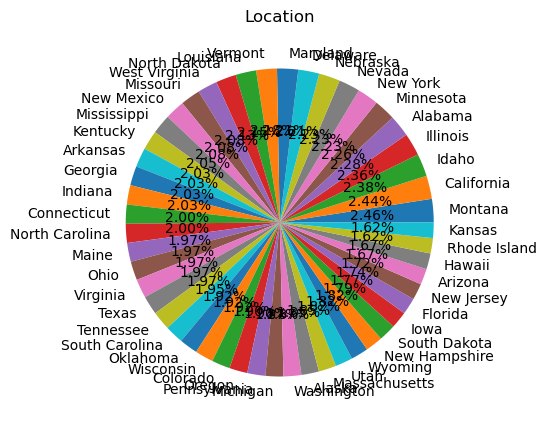

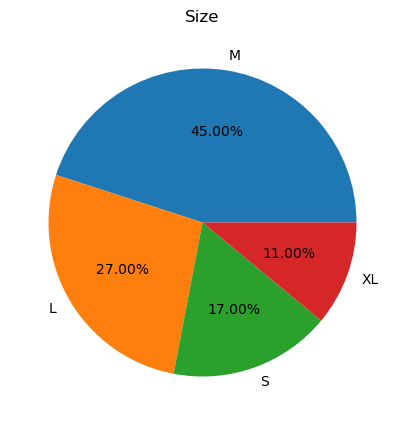

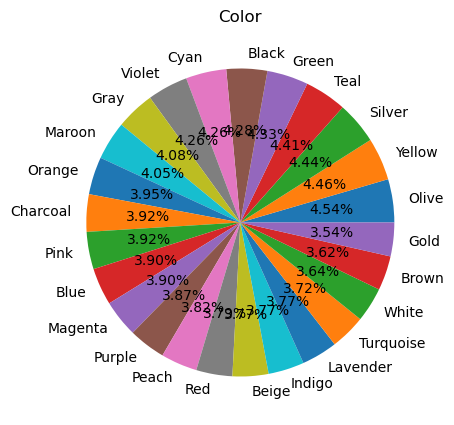

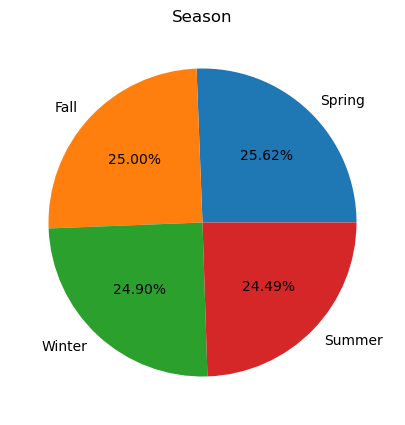

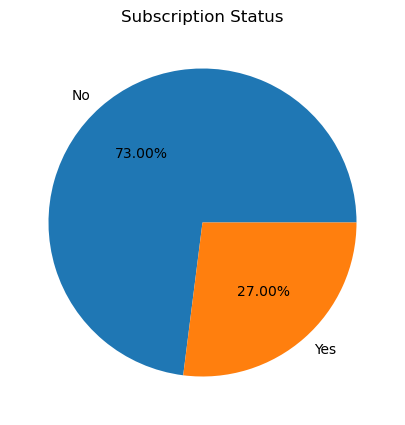

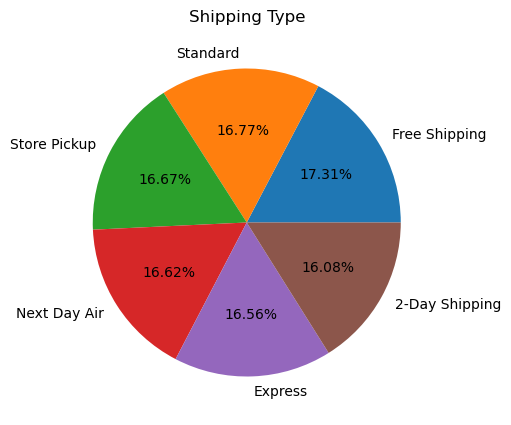

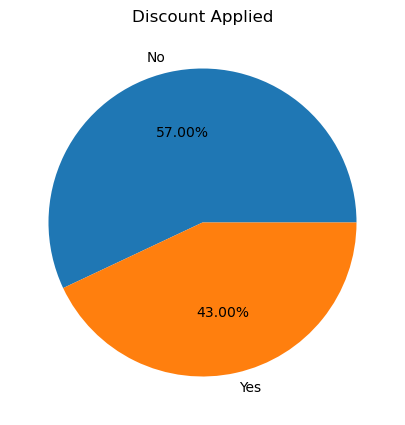

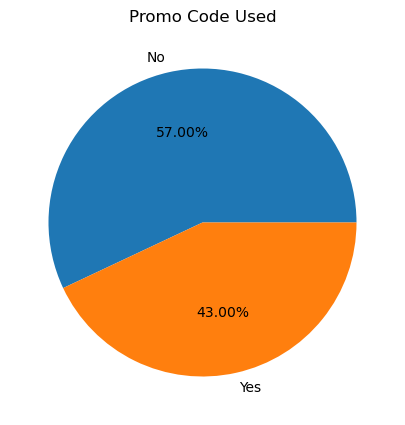

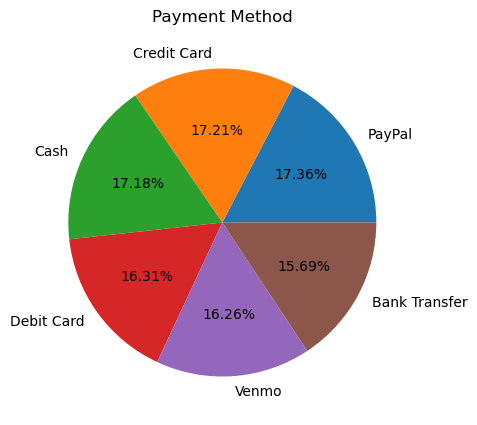

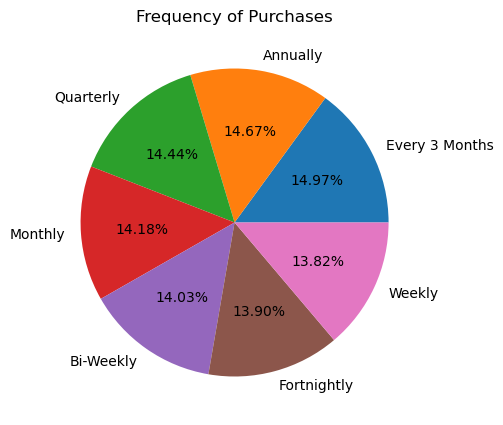

In [116]:
for i in cat:
    
    keys = shopping_df[i].value_counts().keys().tolist()
    values = shopping_df[i].value_counts().values.tolist()

    plt.figure(figsize= (10,5))
    plt.pie(x= values , labels= keys , autopct= "%0.2f%%")
    plt.title(i)
    
    folder = "all pie charts"
    os.makedirs(folder , exist_ok=True)
    
    cwd = os.getcwd()
    new_cwd = os.path.join(cwd , folder)
    
    file = f"{i}.png"
    path = os.path.join(new_cwd , file)
    plt.savefig(path)

# subplots

In [117]:
cat

Index(['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color',
       'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [118]:
len(cat)

13

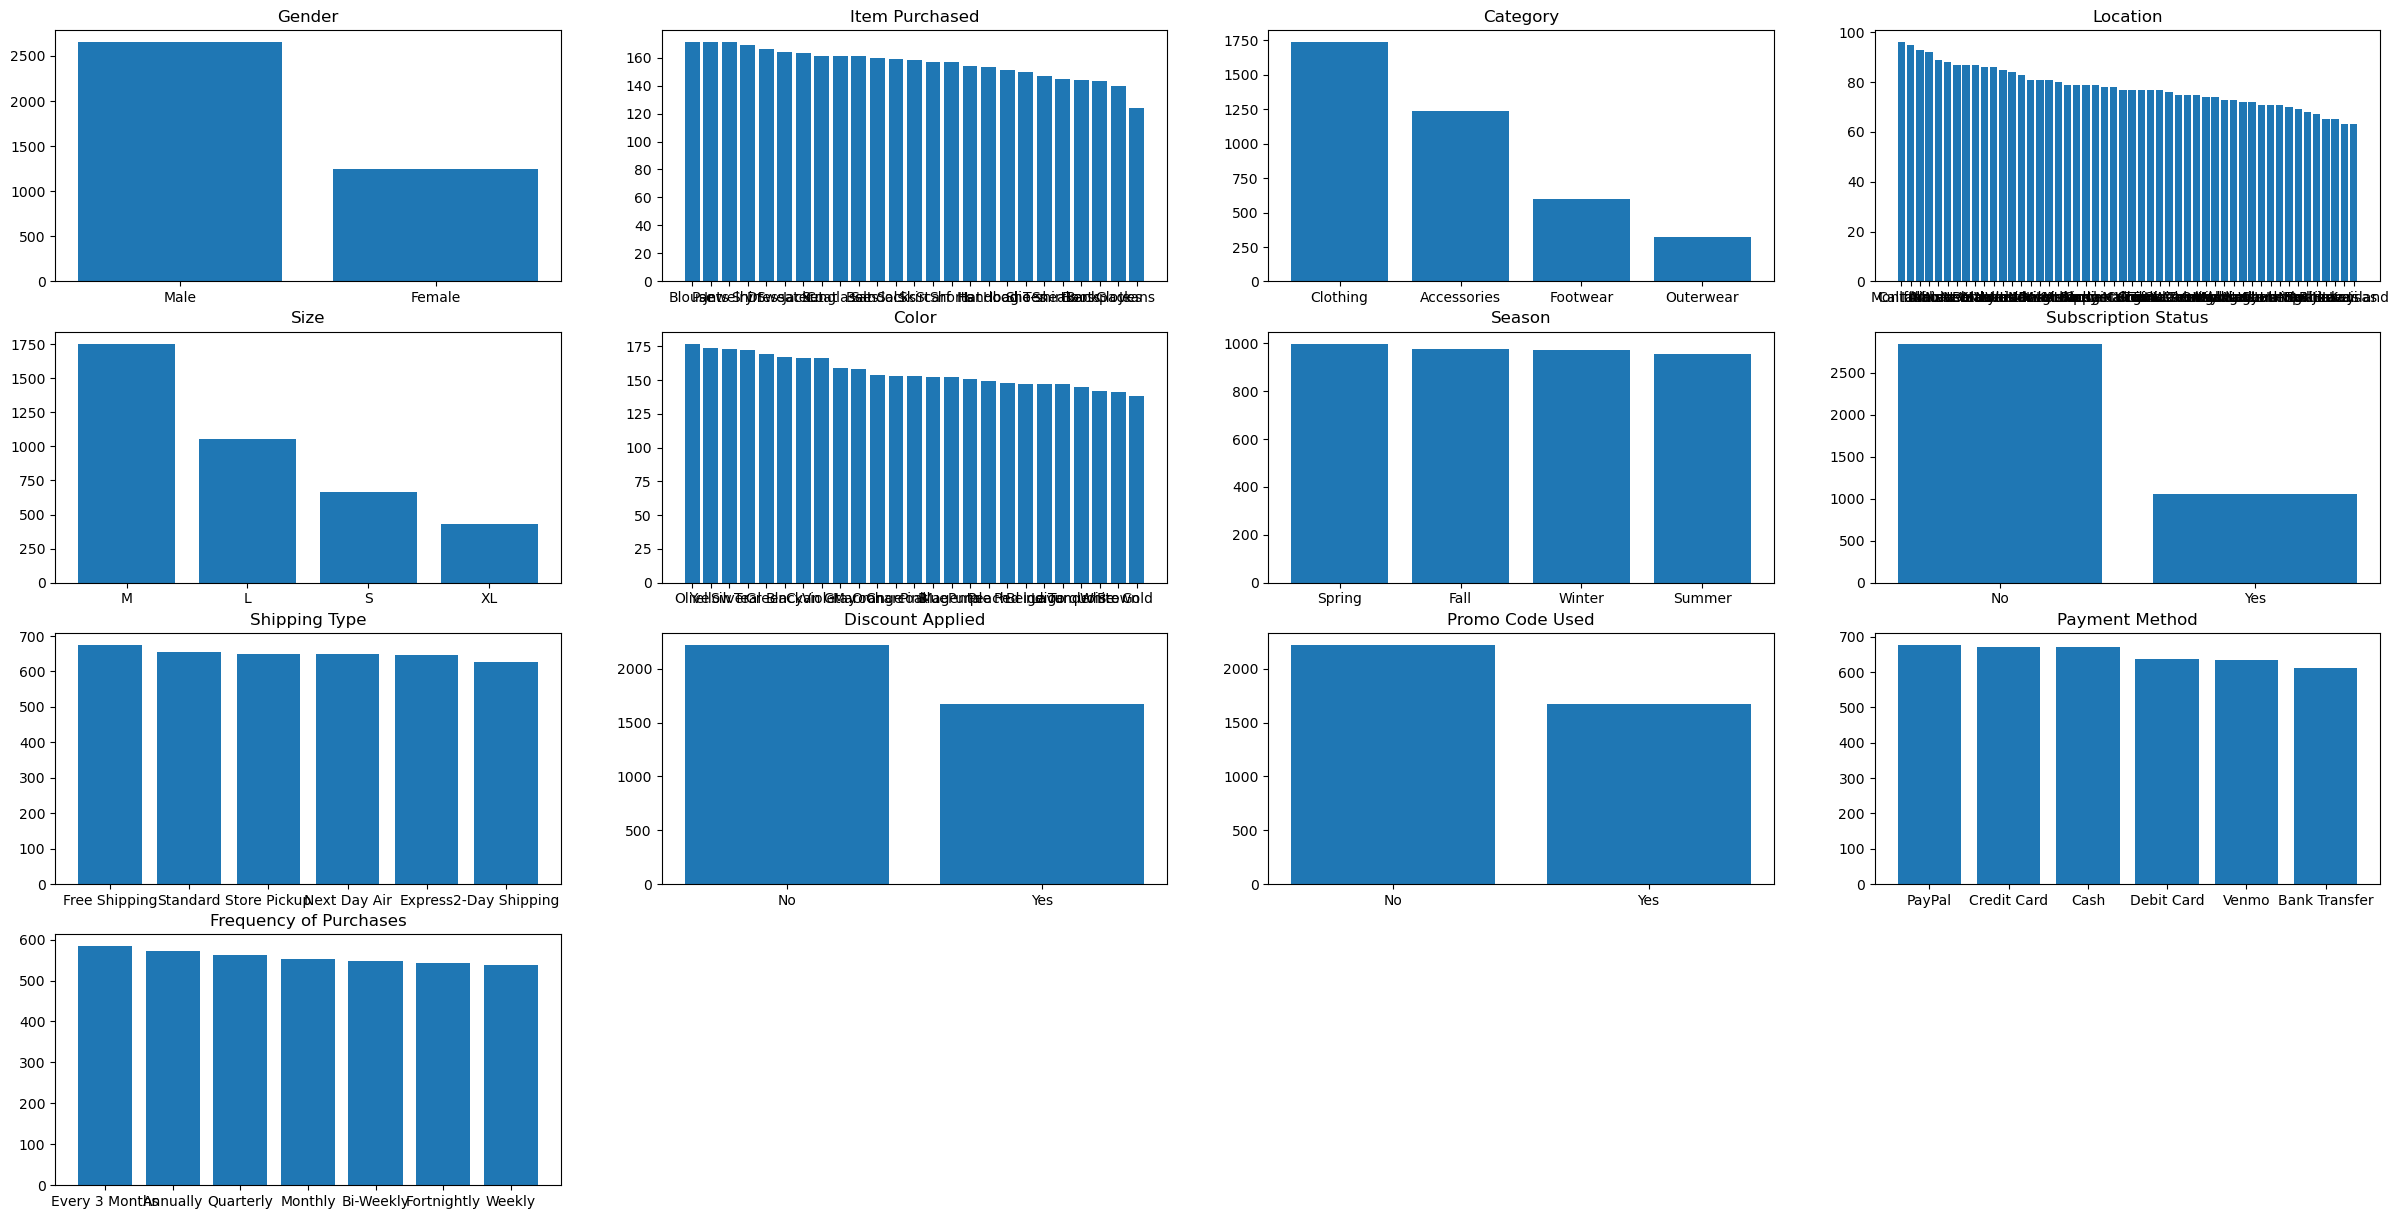

In [119]:
plt.figure(figsize=(30,15))
for i,j in enumerate(cat):
    keys = shopping_df[j].value_counts().keys().tolist()
    values = shopping_df[j].value_counts().values.tolist()
    
    plt.subplot(4,4,i+1)
    plt.bar(x= keys,height= values)
    plt.title(j)

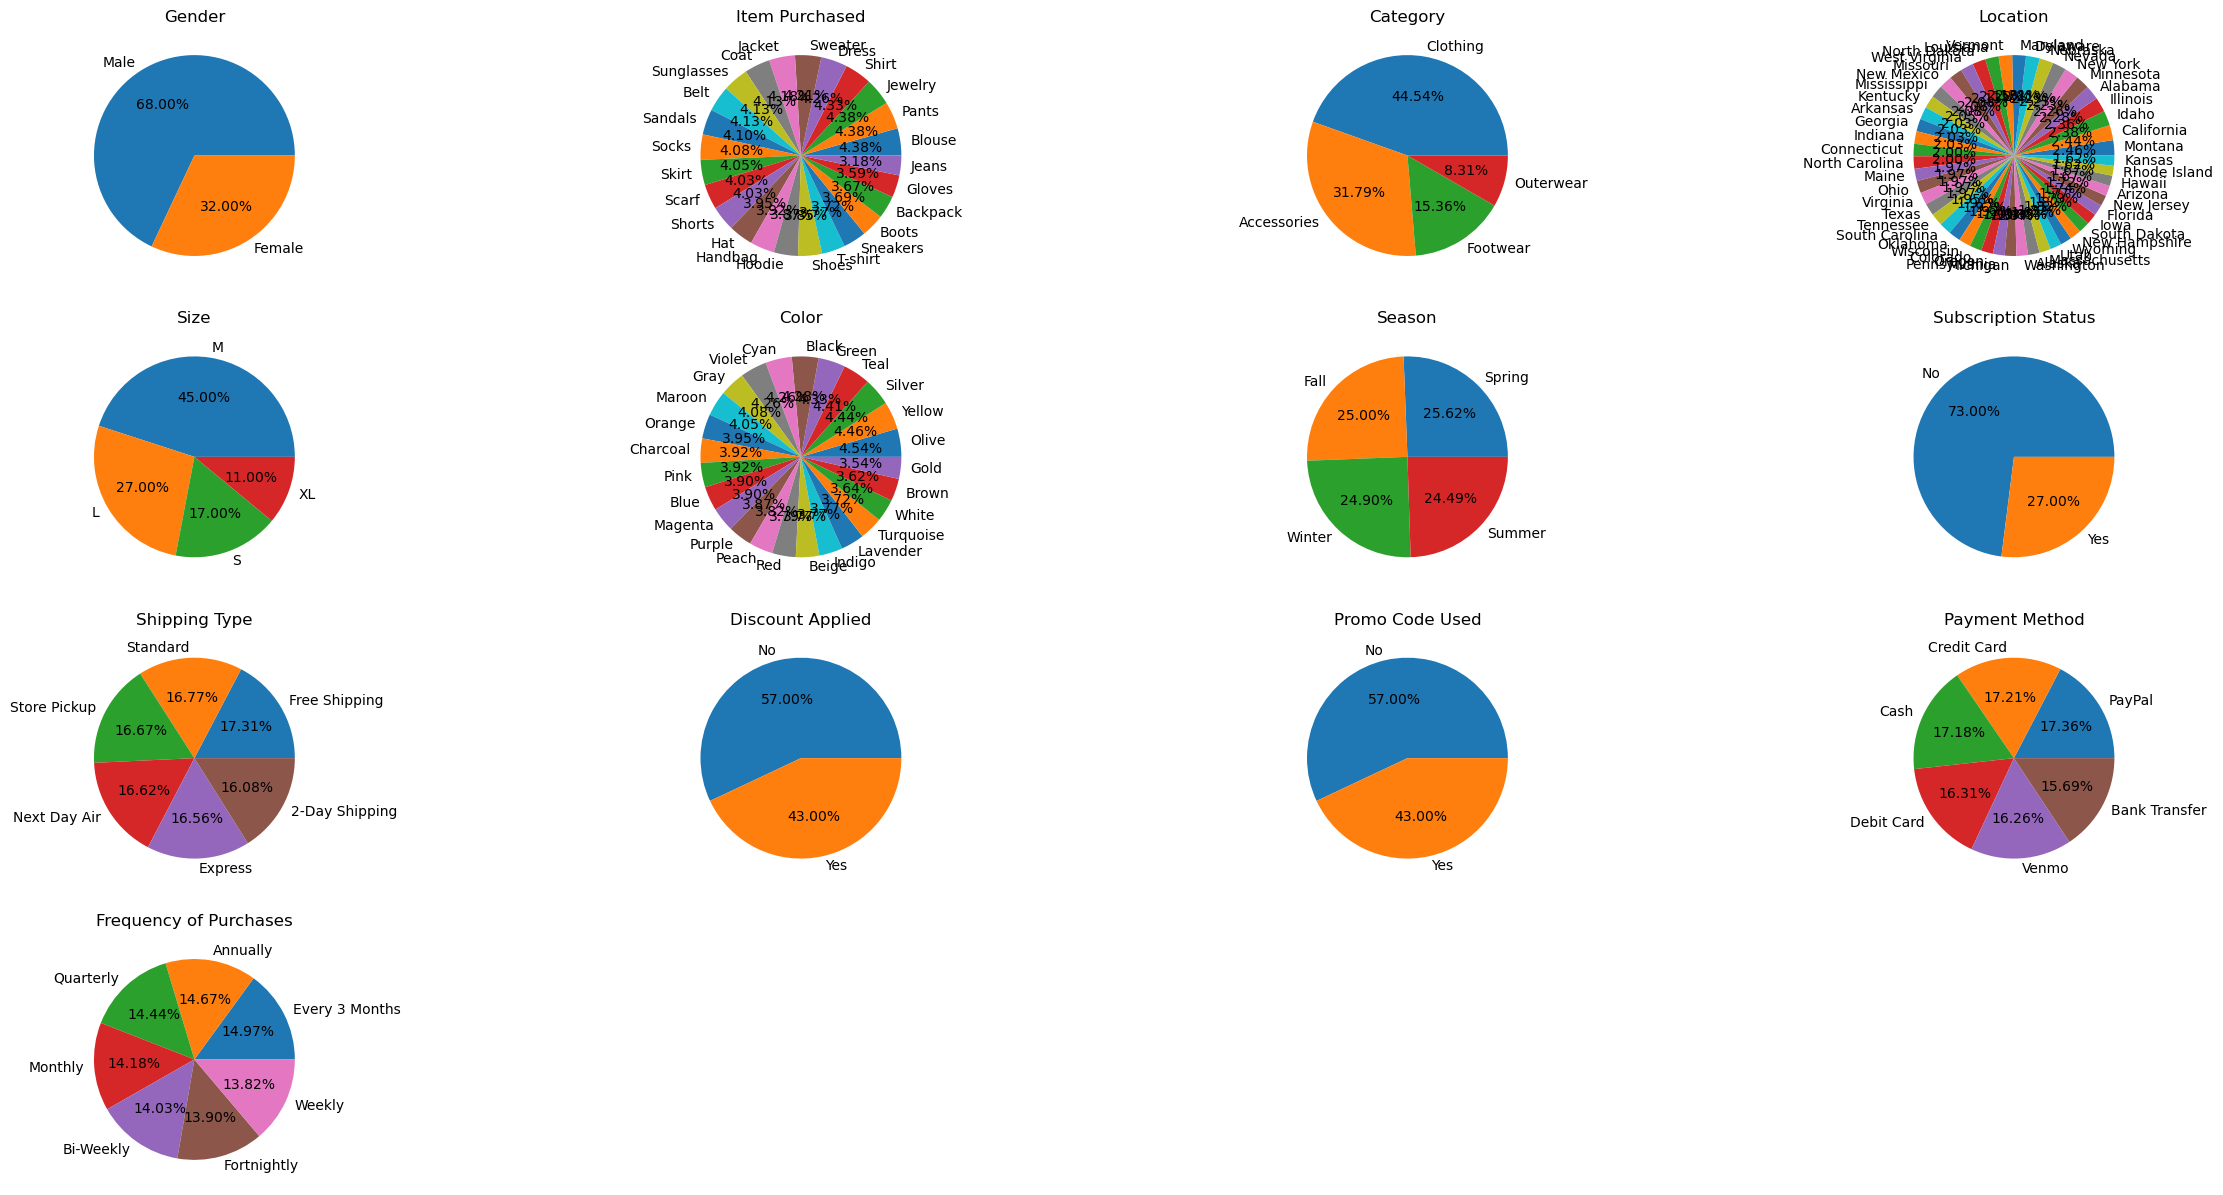

In [120]:
plt.figure(figsize=(30,15))
for i,j in enumerate(cat):
    keys = shopping_df[j].value_counts().keys().tolist()
    values = shopping_df[j].value_counts().values.tolist()
    
    plt.subplot(4,4,i+1)
    plt.pie(x= values , labels= keys , autopct= "%0.2f%%")
    plt.title(j)

# numerical analysis

In [121]:
num

Index(['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating',
       'Previous Purchases'],
      dtype='object')

In [122]:
len(num)

5

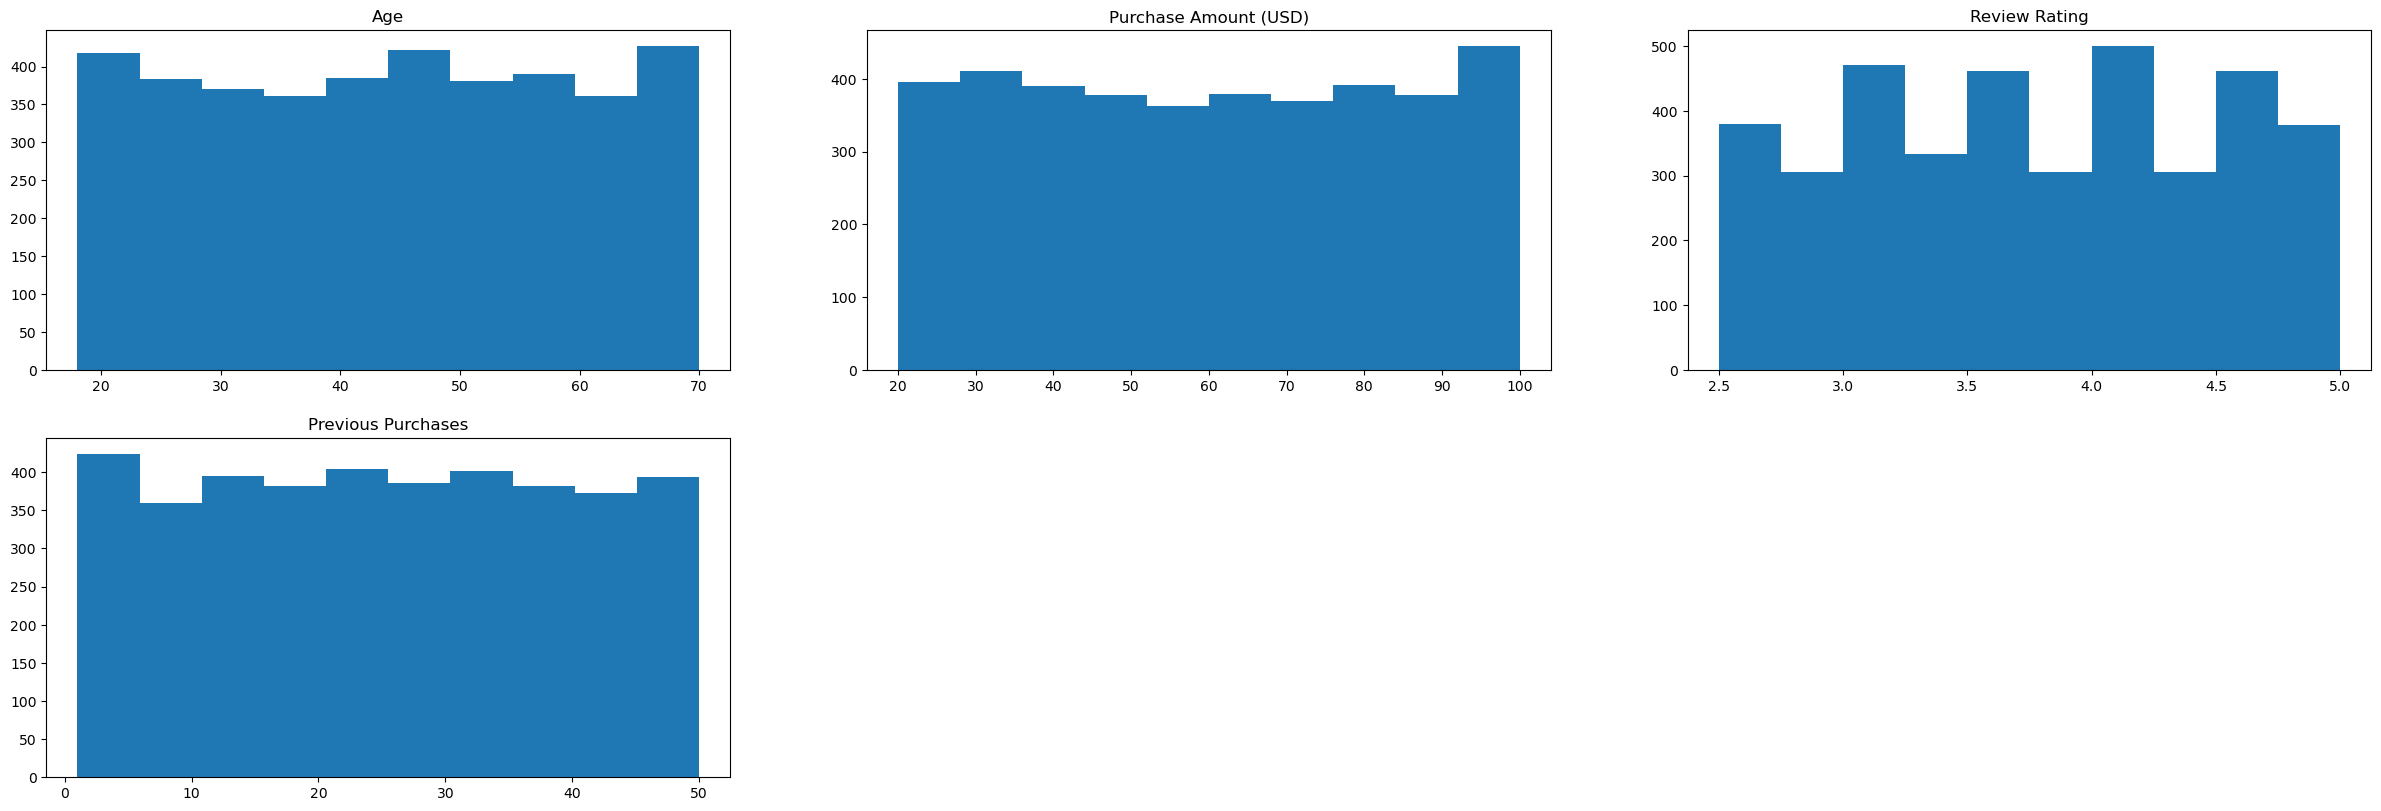

In [123]:
plt.figure(figsize=(30,15))
for i,j in enumerate(num[1:]):
    plt.subplot(3,3, i+1).hist(shopping_df[j])
    plt.title(j)

(array([69., 81.,  0., 62.,  0., 69.,  0., 66.,  0., 71.,  0., 68.,  0.,
        85.,  0., 69.,  0., 83.,  0., 79.,  0., 76.,  0., 71.,  0., 79.,
        82.,  0., 63.,  0., 68.,  0., 72.,  0., 74.,  0., 77.,  0., 70.,
         0., 68.,  0., 72.,  0., 86.,  0., 80.,  0., 79.,  0., 51., 72.,
         0., 76.,  0., 71.,  0., 68.,  0., 84.,  0., 83.,  0., 72.,  0.,
        73.,  0., 70.,  0., 83.,  0., 73.,  0., 74.,  0., 87., 81.,  0.,
        75.,  0., 65.,  0., 65.,  0., 83.,  0., 75.,  0., 73.,  0., 72.,
         0., 71.,  0., 54.,  0., 75.,  0., 88., 67.]),
 array([18.  , 18.52, 19.04, 19.56, 20.08, 20.6 , 21.12, 21.64, 22.16,
        22.68, 23.2 , 23.72, 24.24, 24.76, 25.28, 25.8 , 26.32, 26.84,
        27.36, 27.88, 28.4 , 28.92, 29.44, 29.96, 30.48, 31.  , 31.52,
        32.04, 32.56, 33.08, 33.6 , 34.12, 34.64, 35.16, 35.68, 36.2 ,
        36.72, 37.24, 37.76, 38.28, 38.8 , 39.32, 39.84, 40.36, 40.88,
        41.4 , 41.92, 42.44, 42.96, 43.48, 44.  , 44.52, 45.04, 45.56,
        

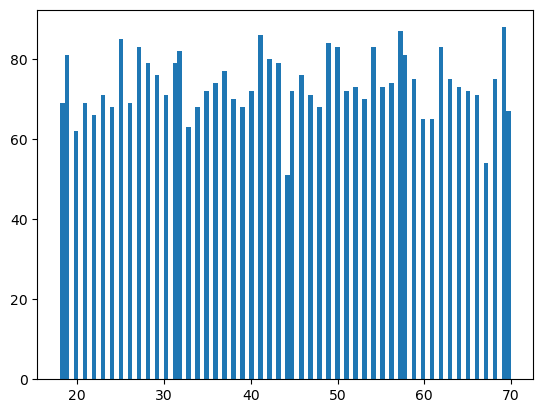

In [124]:
plt.hist(shopping_df['Age'] , bins= 100)

In [125]:
keys = shopping_df['Age'].value_counts().keys().tolist()
values = shopping_df['Age'].value_counts().values.tolist()



l = []
for i,j in zip(keys , values):
    l.append((i,j))

l = sorted(l)
for i,j in l:
    print(i , j)

18 69
19 81
20 62
21 69
22 66
23 71
24 68
25 85
26 69
27 83
28 79
29 76
30 71
31 79
32 82
33 63
34 68
35 72
36 74
37 77
38 70
39 68
40 72
41 86
42 80
43 79
44 51
45 72
46 76
47 71
48 68
49 84
50 83
51 72
52 73
53 70
54 83
55 73
56 74
57 87
58 81
59 75
60 65
61 65
62 83
63 75
64 73
65 72
66 71
67 54
68 75
69 88
70 67


# boxplot

In [126]:
num

Index(['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating',
       'Previous Purchases'],
      dtype='object')

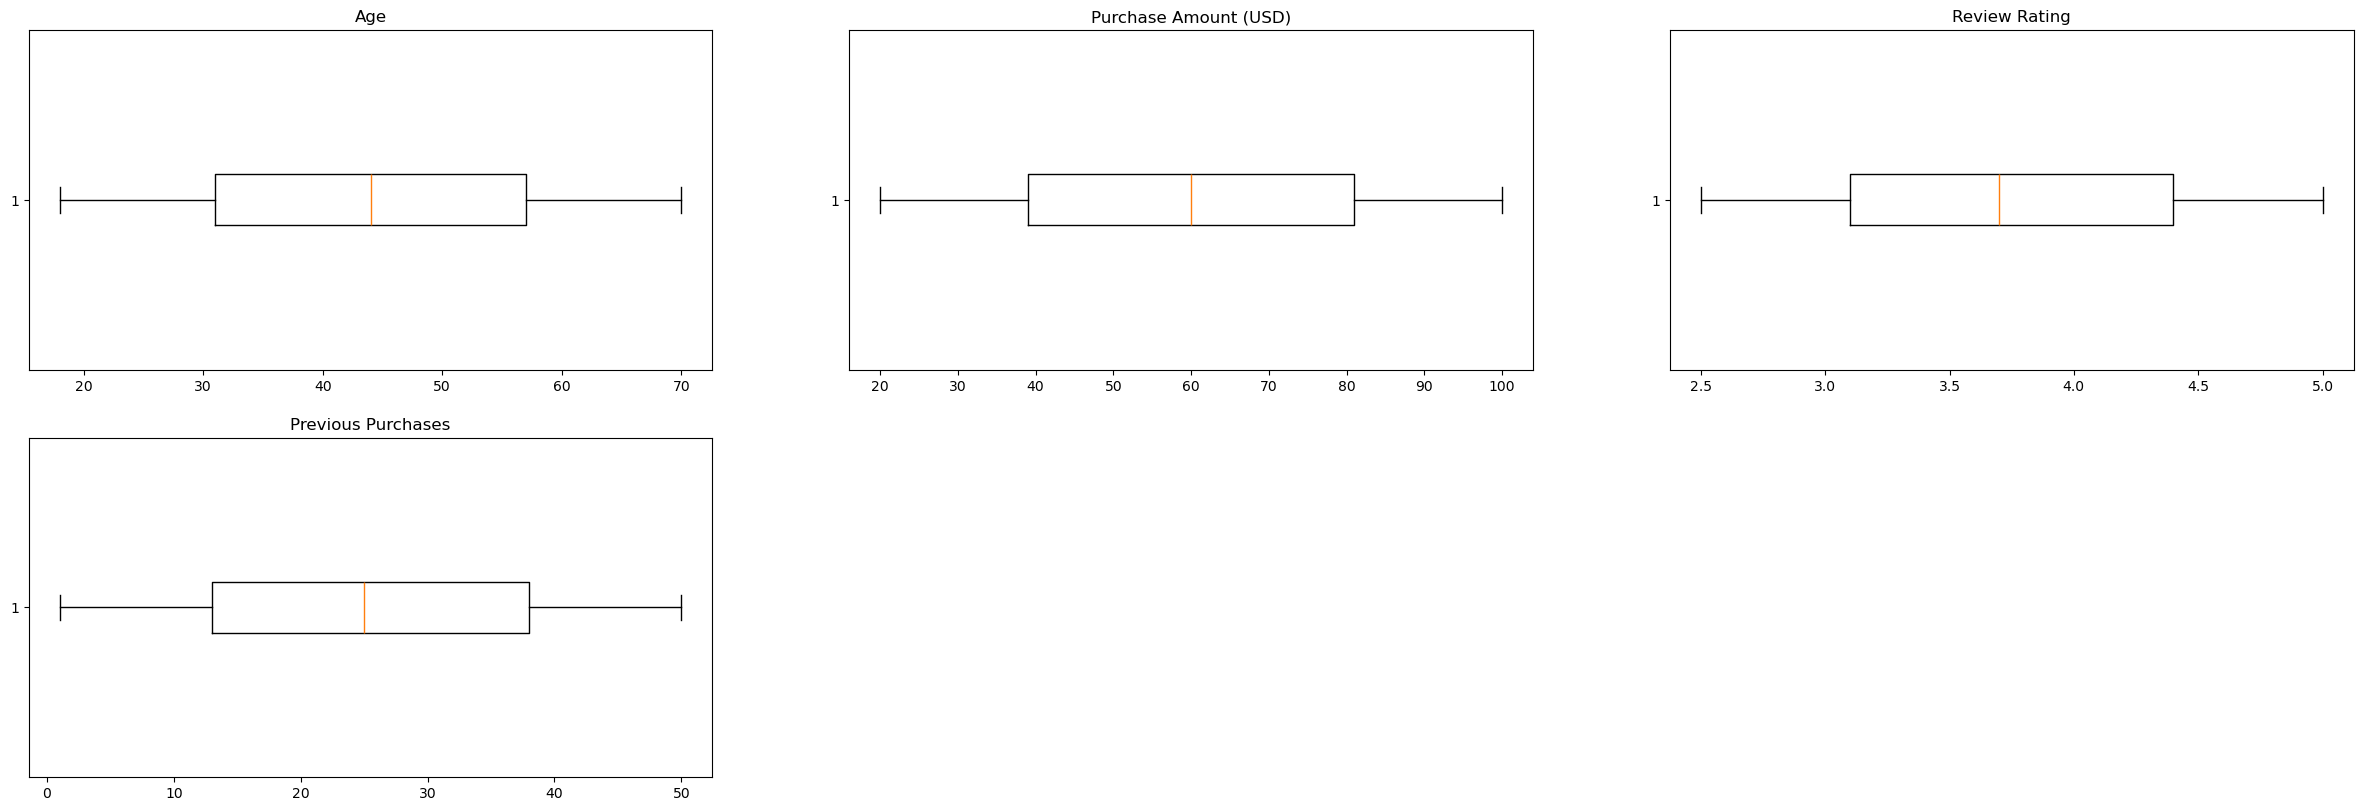

In [127]:
plt.figure(figsize=(30 ,15))
for i,j in enumerate(num[1:]):
    plt.subplot(3,3,i+1)
    plt.boxplot(shopping_df[j] , vert= False)
    plt.title(j)

# bivariance and multivariance

In [128]:
con1 = shopping_df['Category']
con2 = shopping_df['Age']
df = pd.crosstab(con2,con1)
df

Category,Accessories,Clothing,Footwear,Outerwear
Age,,,,
18,18,33,8,10
19,25,36,12,8
20,16,35,8,3
21,20,35,9,5
22,25,29,6,6
23,19,29,14,9
24,19,39,4,6
25,30,33,18,4
26,24,27,10,8


In [129]:
for i in df.columns:
    a =  max(df[i])
    print(f"{i} =  max {a}")
    b = min(df[i])
    print(f"{i} = min {b}")
    

Accessories =  max 34
Accessories = min 16
Clothing =  max 44
Clothing = min 15
Footwear =  max 24
Footwear = min 4
Outerwear =  max 13
Outerwear = min 3


# 1️⃣ Which Gender buys more?

<Axes: xlabel='Item Purchased'>

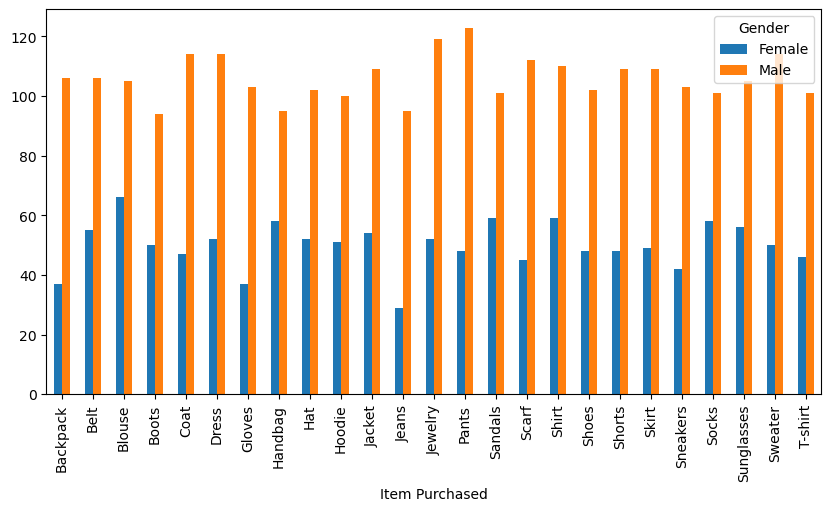

In [130]:
con1 = shopping_df['Gender']
con2 = shopping_df['Item Purchased']
df= pd.crosstab(con2 , con1)

df.plot(kind = "bar" , figsize = (10,5))

# - Compare purchases by Age Group


In [131]:
uniques_ages = shopping_df['Age'].unique()
for i in uniques_ages:
    con1 = shopping_df['Age'] == i
    sum_of_products = shopping_df[con1].groupby("Item Purchased").size().sum()
    print(f"age = {i} : no of products buyed : {sum_of_products}")
    

age = 55 : no of products buyed : 73
age = 19 : no of products buyed : 81
age = 50 : no of products buyed : 83
age = 21 : no of products buyed : 69
age = 45 : no of products buyed : 72
age = 46 : no of products buyed : 76
age = 63 : no of products buyed : 75
age = 27 : no of products buyed : 83
age = 26 : no of products buyed : 69
age = 57 : no of products buyed : 87
age = 53 : no of products buyed : 70
age = 30 : no of products buyed : 71
age = 61 : no of products buyed : 65
age = 65 : no of products buyed : 72
age = 64 : no of products buyed : 73
age = 25 : no of products buyed : 85
age = 52 : no of products buyed : 73
age = 66 : no of products buyed : 71
age = 31 : no of products buyed : 79
age = 56 : no of products buyed : 74
age = 18 : no of products buyed : 69
age = 38 : no of products buyed : 70
age = 54 : no of products buyed : 83
age = 33 : no of products buyed : 63
age = 36 : no of products buyed : 74
age = 35 : no of products buyed : 72
age = 29 : no of products buyed : 76
a

In [135]:
con1 = shopping_df['Age'] 
con2 = shopping_df['Item Purchased'] 
df = pd.crosstab(con1 , con2)
df

Item Purchased,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,Hoodie,...,Scarf,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt
Age,,,,,,,,,,,,,,,,,,,,,
18,1,2,2,3,5,5,4,2,1,1,...,4,6,0,3,4,3,5,3,3,1
19,4,4,4,1,6,5,3,2,2,2,...,3,4,5,3,3,4,2,5,6,2
20,1,6,4,4,2,2,2,4,1,1,...,2,3,2,2,5,1,2,0,6,2
21,2,4,5,2,4,4,1,2,5,2,...,1,3,1,1,1,4,6,1,3,5
22,1,3,1,0,2,3,2,5,4,2,...,4,3,3,1,1,1,4,3,3,4
23,1,0,0,2,5,3,6,2,3,4,...,2,1,2,6,2,7,1,4,3,3
24,2,5,4,0,3,3,3,3,1,3,...,2,4,1,4,4,2,1,0,5,6
25,4,2,3,6,2,4,3,1,6,2,...,5,2,0,7,7,6,2,4,2,2
26,5,3,2,1,5,3,2,0,4,4,...,2,3,5,0,3,0,2,3,4,2


<Axes: xlabel='Age'>

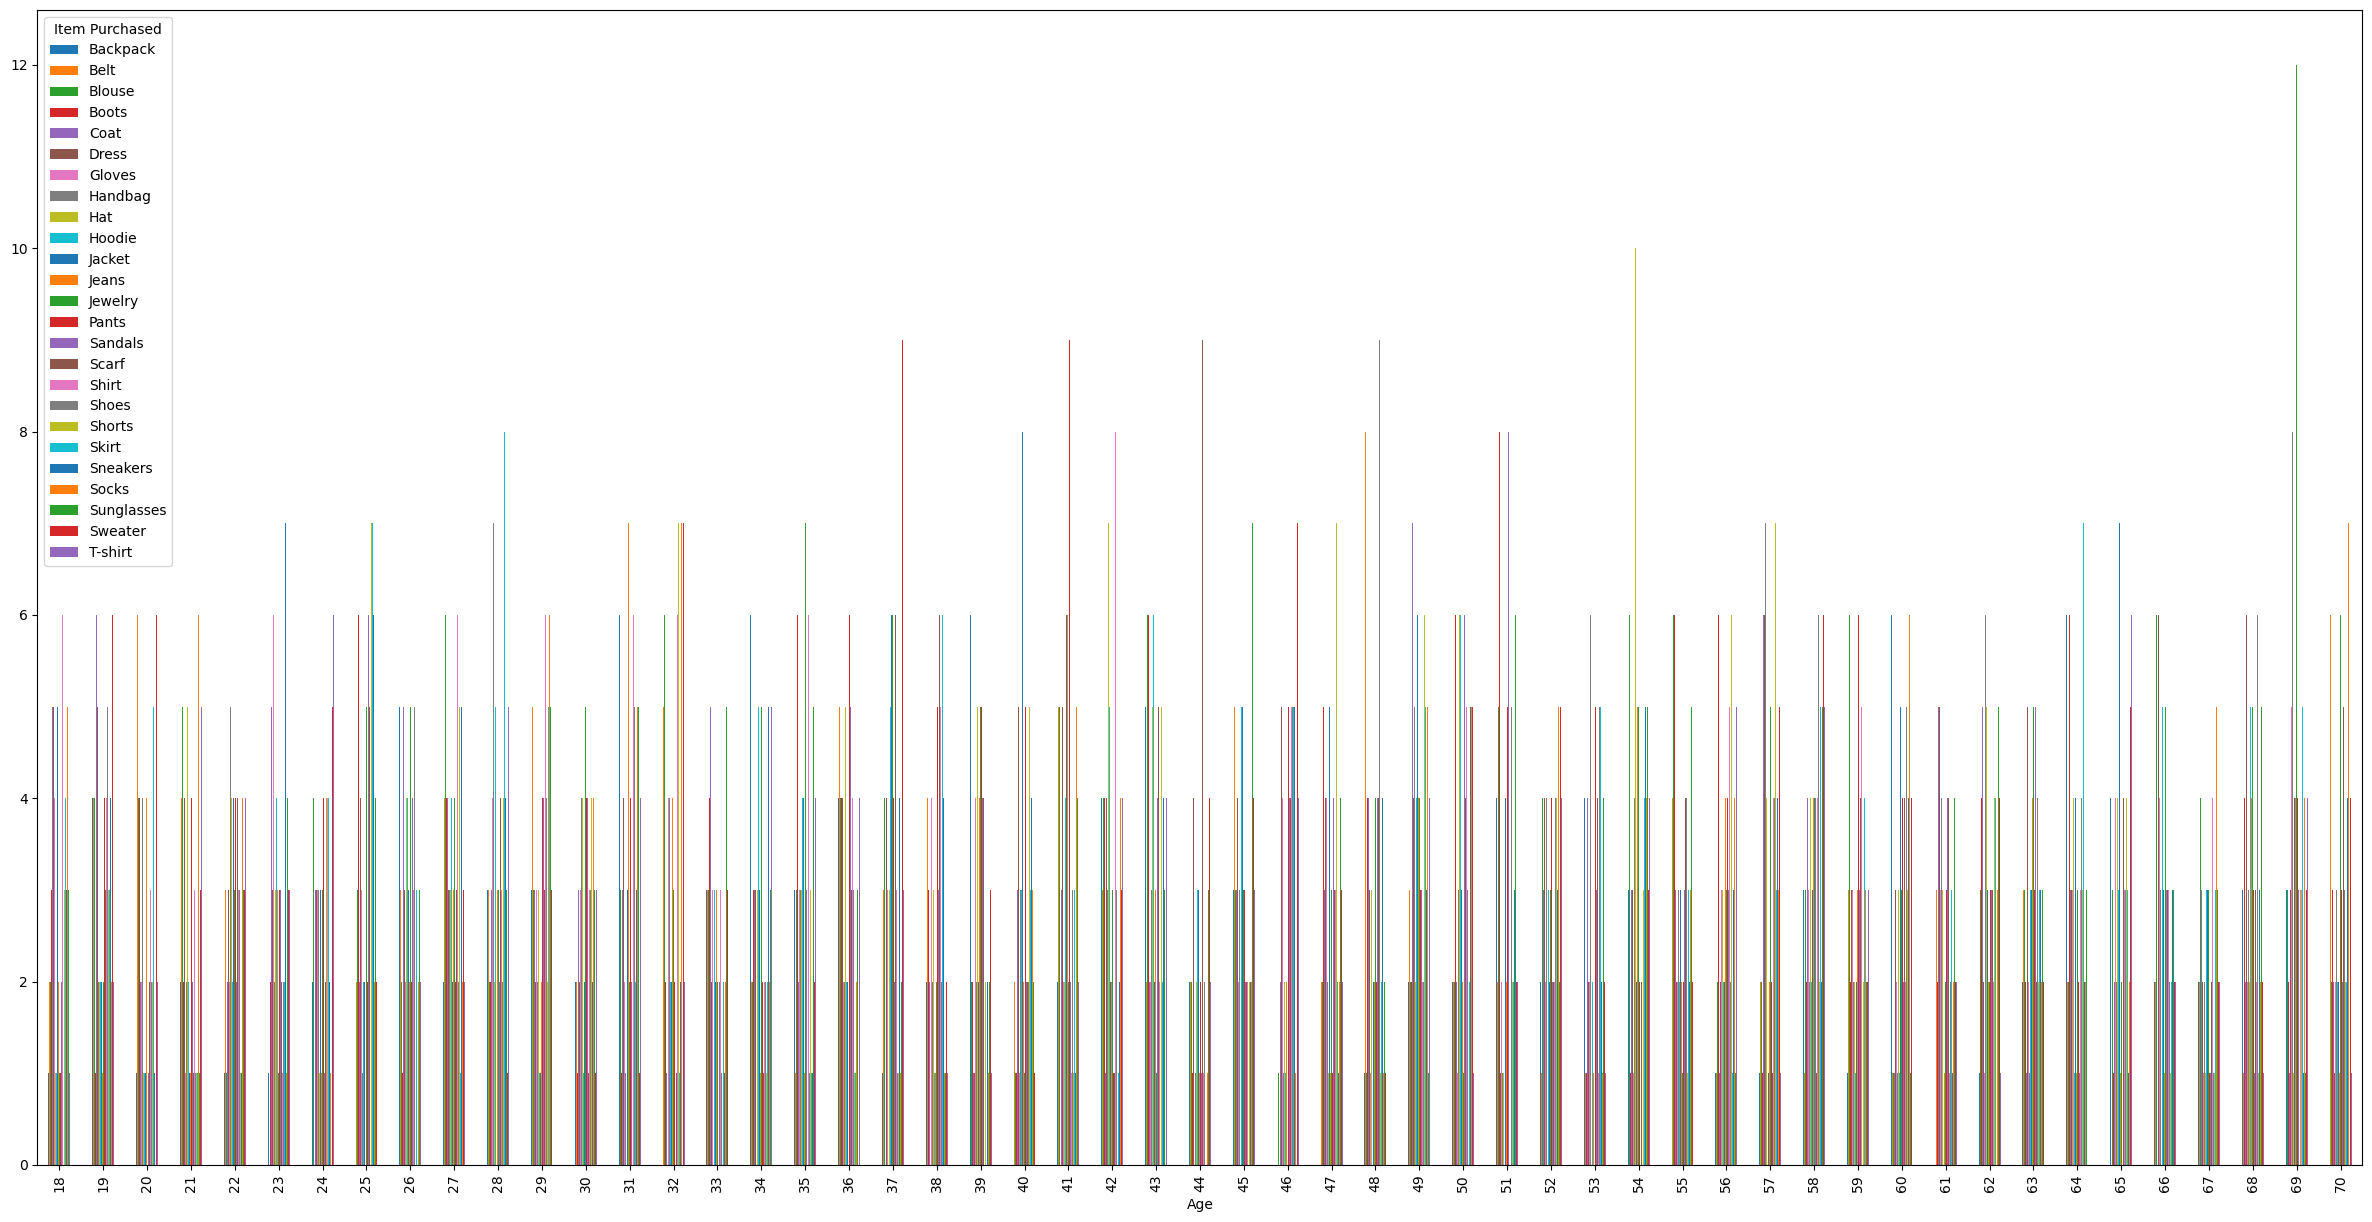

In [133]:
con1 = shopping_df['Age']
#con2 = shopping_df['Frequency of Purchases']
con3 = shopping_df['Item Purchased']
#con = [con2 , con3]
df = pd.crosstab(con1 , con3)

df.plot(kind = "bar" , figsize = (30,15))

<Axes: xlabel='Item Purchased', ylabel='Age'>

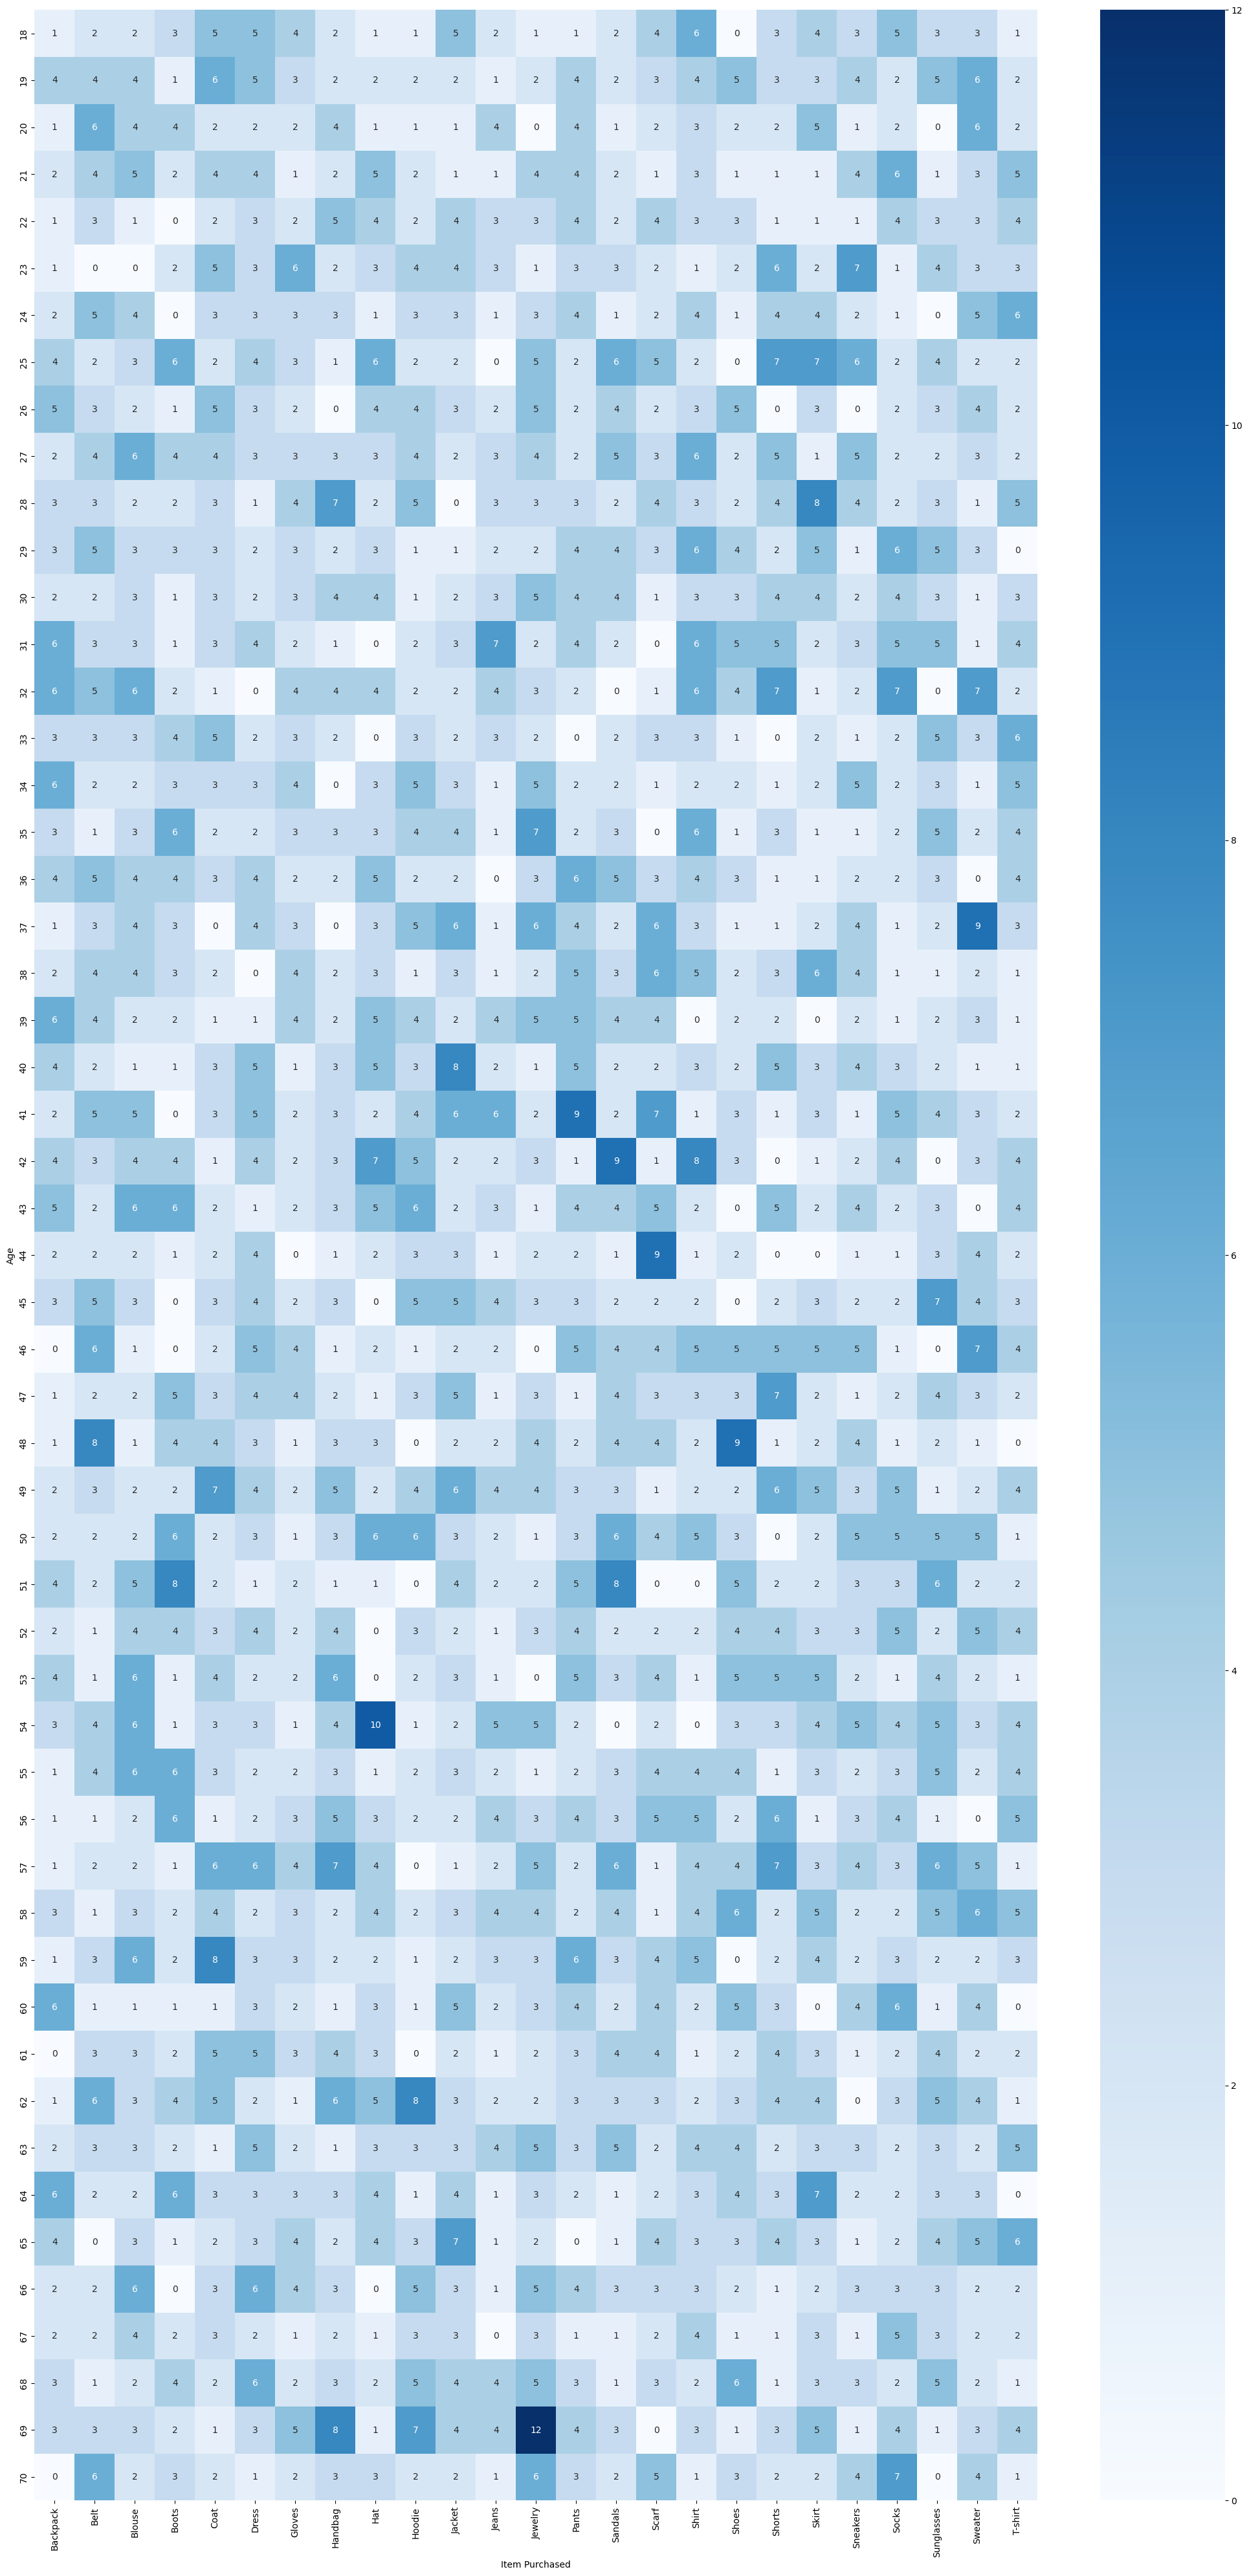

In [136]:
con1 = shopping_df['Age']
#con2 = shopping_df['Frequency of Purchases']
con3 = shopping_df['Item Purchased']
#con = [con2 , con3]
df = pd.crosstab(con1 , con3)
plt.figure(figsize=(25,50))
sns.heatmap(df , annot=True , cmap= "Blues")

# - Compare purchases by Age Group


<Axes: xlabel='Age_group'>

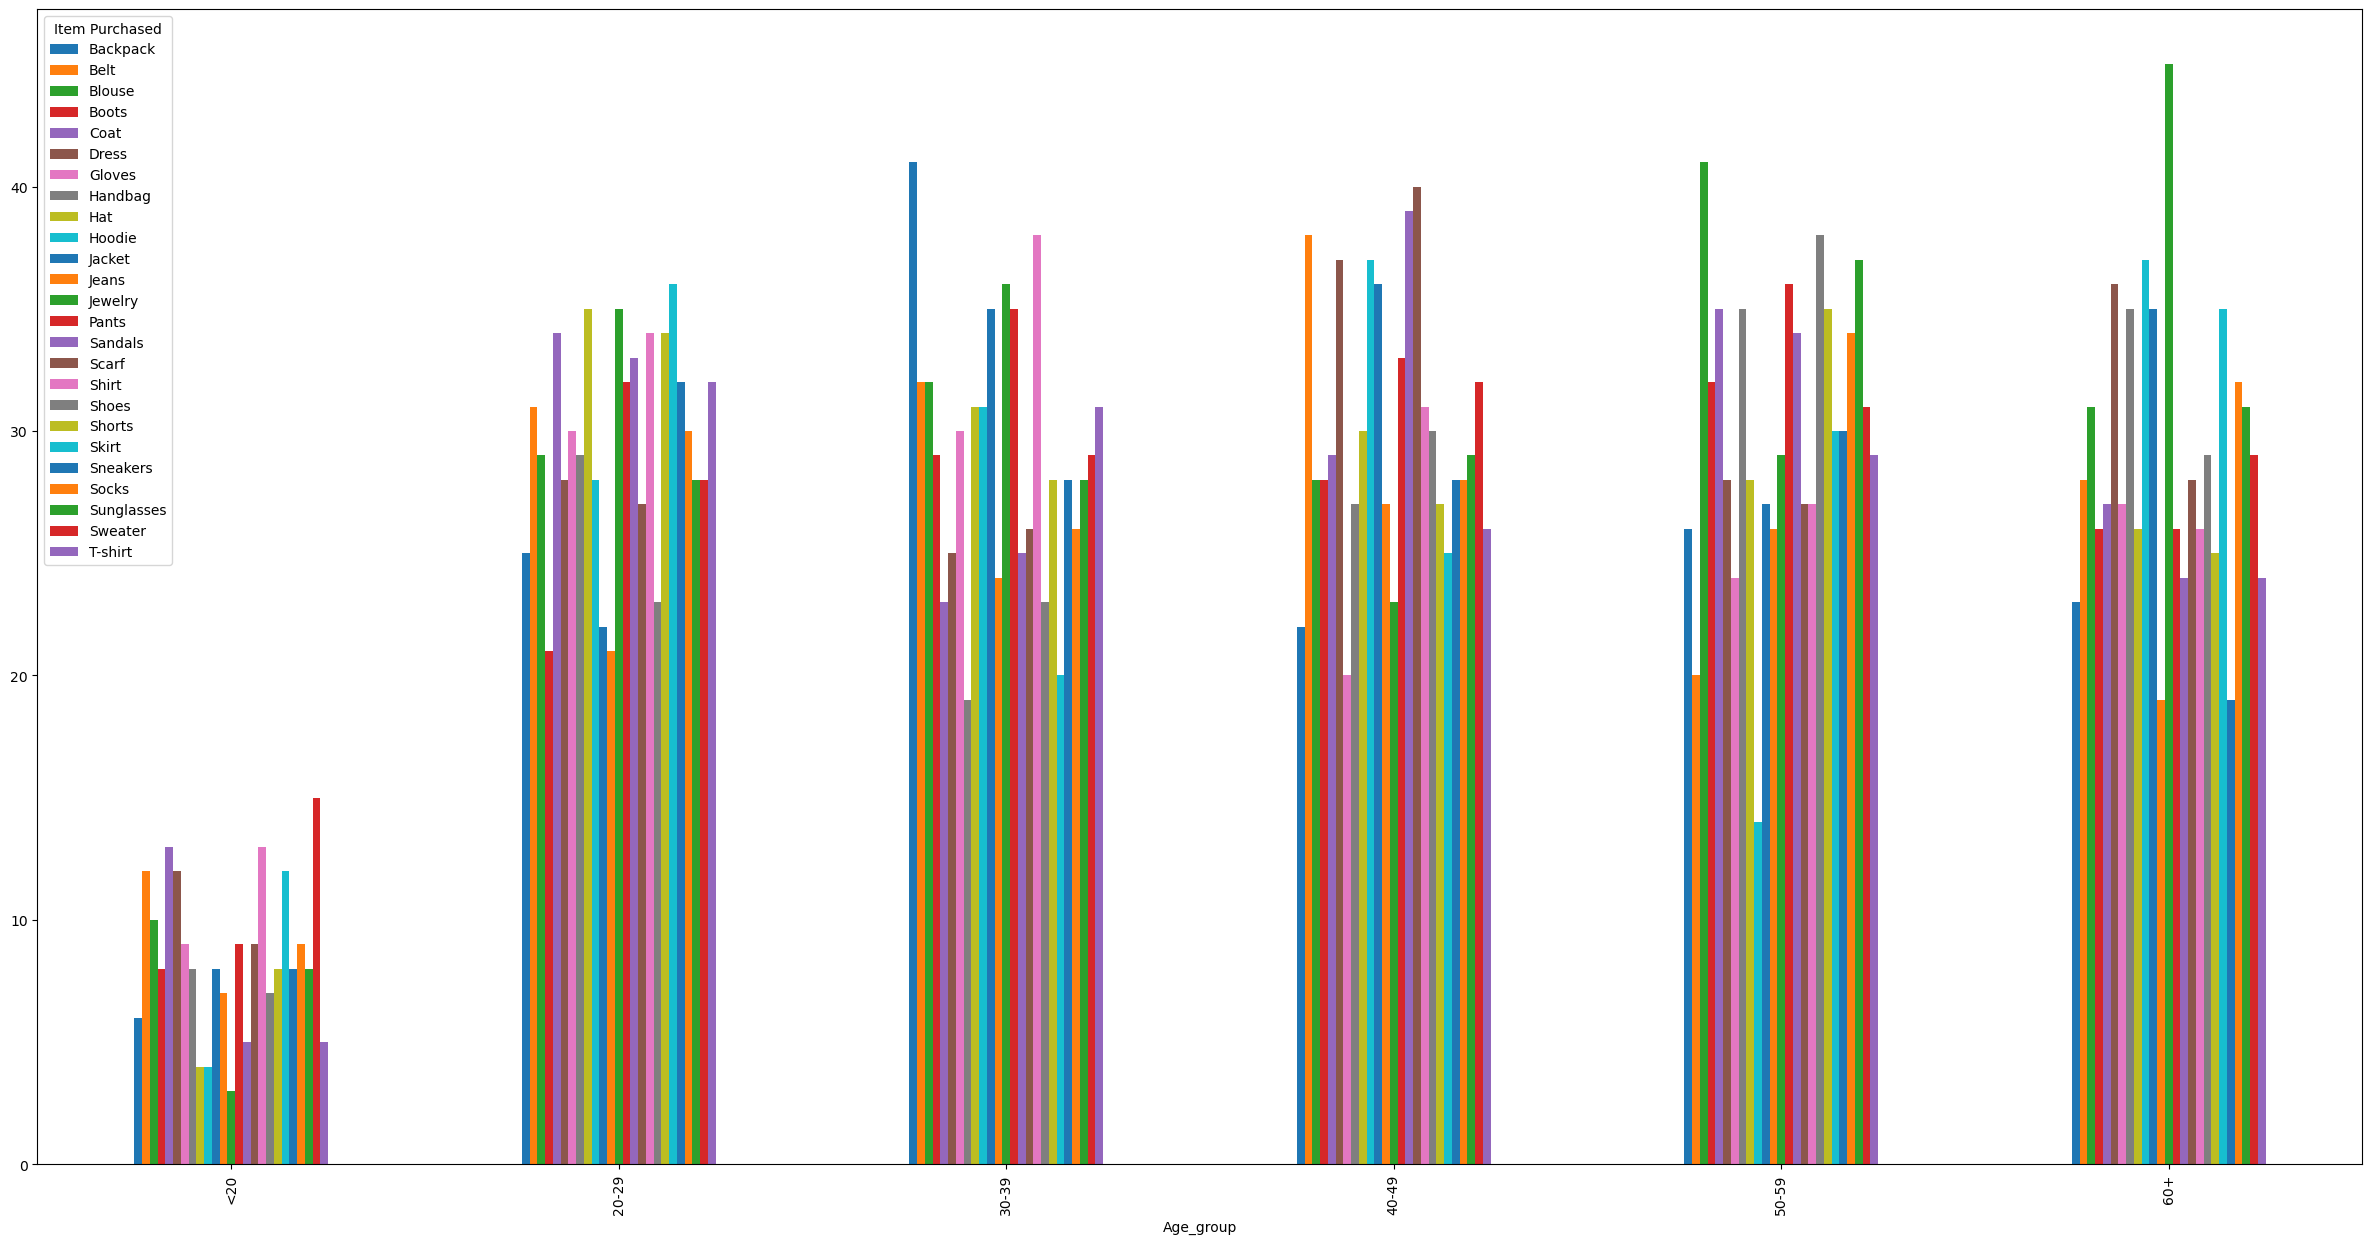

In [162]:
age_intervals = [0,20,30,40,50,60,70]
labels = ["<20" , "20-29" , "30-39" , "40-49" ,"50-59","60+"]
shopping_df['Age_group'] = pd.cut(shopping_df['Age'] , bins= age_intervals , labels= labels)
con1 = shopping_df['Age_group']
con2 = shopping_df['Item Purchased']

df = pd.crosstab(con1 , con2)
df.plot(kind = "bar" , figsize = (30,15))

In [ ]:
2. Which products are purchased the most?
Goal: Find high-demand items.
- Top 10 most purchased items
- Fast-moving products

<BarContainer object of 25 artists>

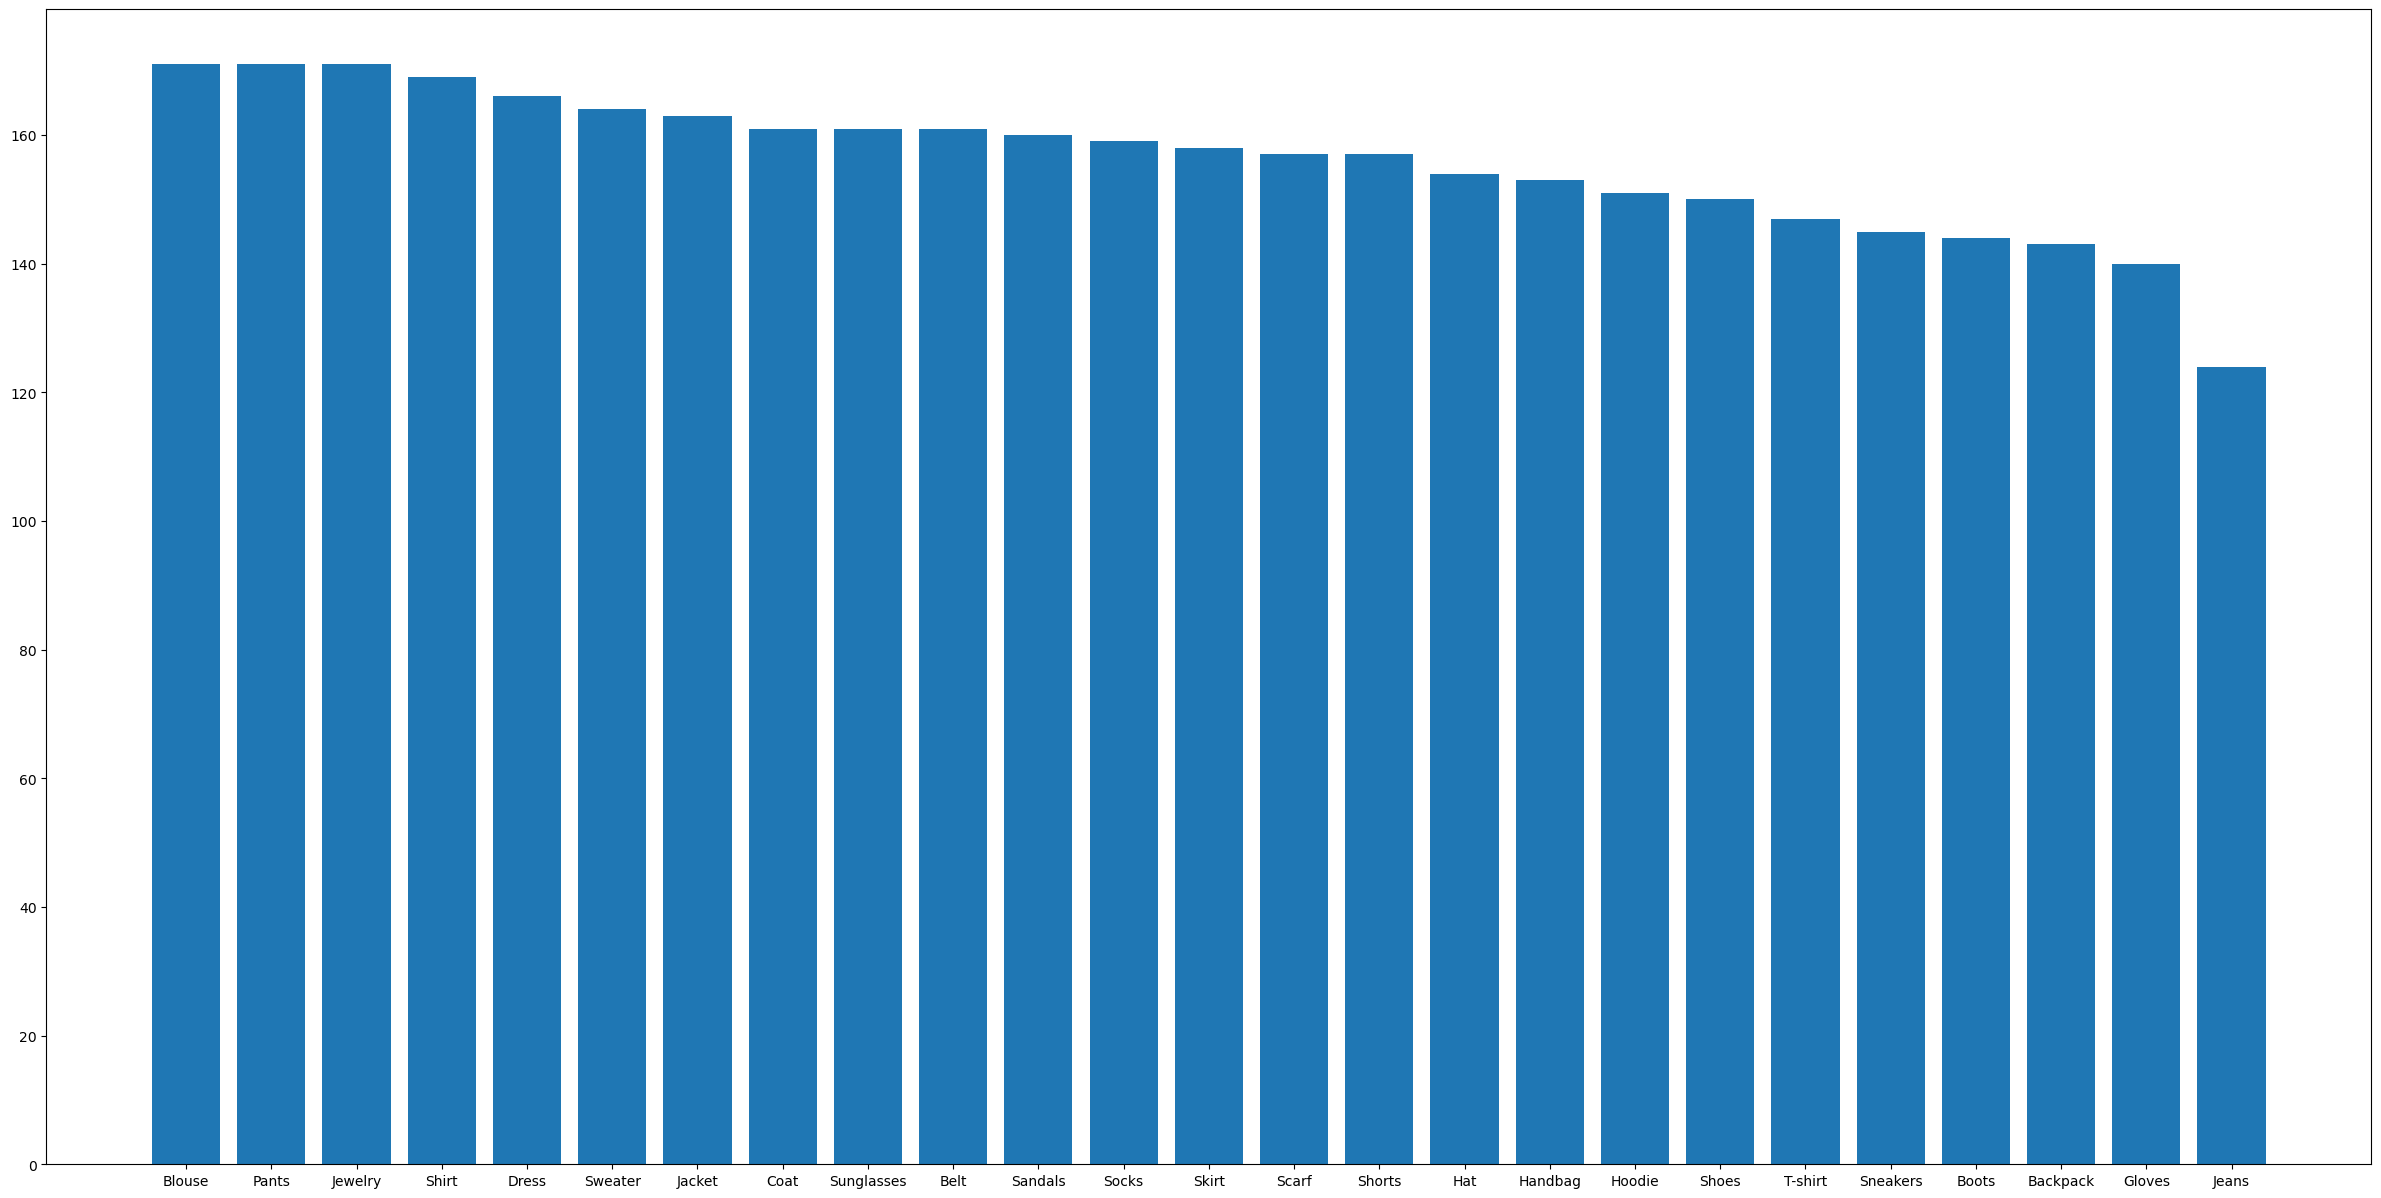

In [174]:
keys = shopping_df['Item Purchased'].value_counts() .keys().tolist()
values= shopping_df['Item Purchased'].value_counts().values.tolist()

plt.figure(figsize=(30,15))
plt.bar(x = keys , height= values)

# - Top 10 most purchased items


In [175]:
shopping_df['Item Purchased'].value_counts().head(10)

Item Purchased
Blouse        171
Pants         171
Jewelry       171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Coat          161
Sunglasses    161
Belt          161
Name: count, dtype: int64

# 3. Which product categories perform best?
### Goal: Understand category-level performance.
# 1)  Clothing vs Accessories vs Footwear

In [182]:
l = ["Clothing" , "Accessories" , "Footwear"]

for i in l:
    con = shopping_df['Category'] == i
    df = shopping_df[con].groupby("Item Purchased").size().sum()
    print( f"{i} = {df}")



Clothing = 1737
Accessories = 1240
Footwear = 599


# 2) - Category with maximum transactions 

In [214]:
shopping_df.columns

Index(['Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Previous Purchases', 'Payment Method',
       'Frequency of Purchases', 'Age_group'],
      dtype='object')

In [212]:
shopping_df['Category'].value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

In [200]:
shopping_df['Category'].value_counts().idxmax()

'Clothing'

<Axes: xlabel='Item Purchased'>

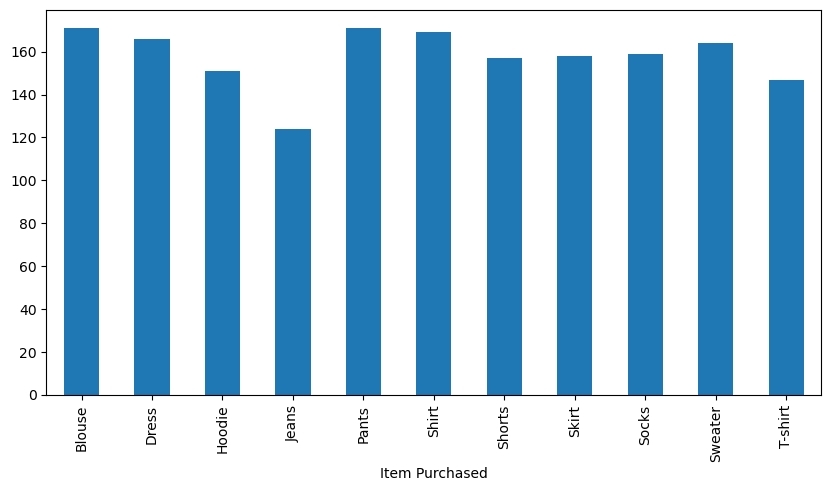

In [217]:
con = shopping_df['Category'] == "Clothing"
df = shopping_df[con].groupby("Item Purchased").size()
df.plot(kind = "bar" , figsize = (10,5))

# 3) Category-wise distribution of payment methods¶

In [194]:
con = shopping_df['Category']
con1 = shopping_df['Payment Method']

df = pd.crosstab(con , con1)
df


Payment Method,Bank Transfer,Cash,Credit Card,Debit Card,PayPal,Venmo
Category,,,,,,
Accessories,180,214,218,195,232,201
Clothing,285,301,306,293,282,270
Footwear,92,104,93,99,103,108
Outerwear,55,51,54,49,60,55


Axes(0.125,0.11;0.775x0.77)


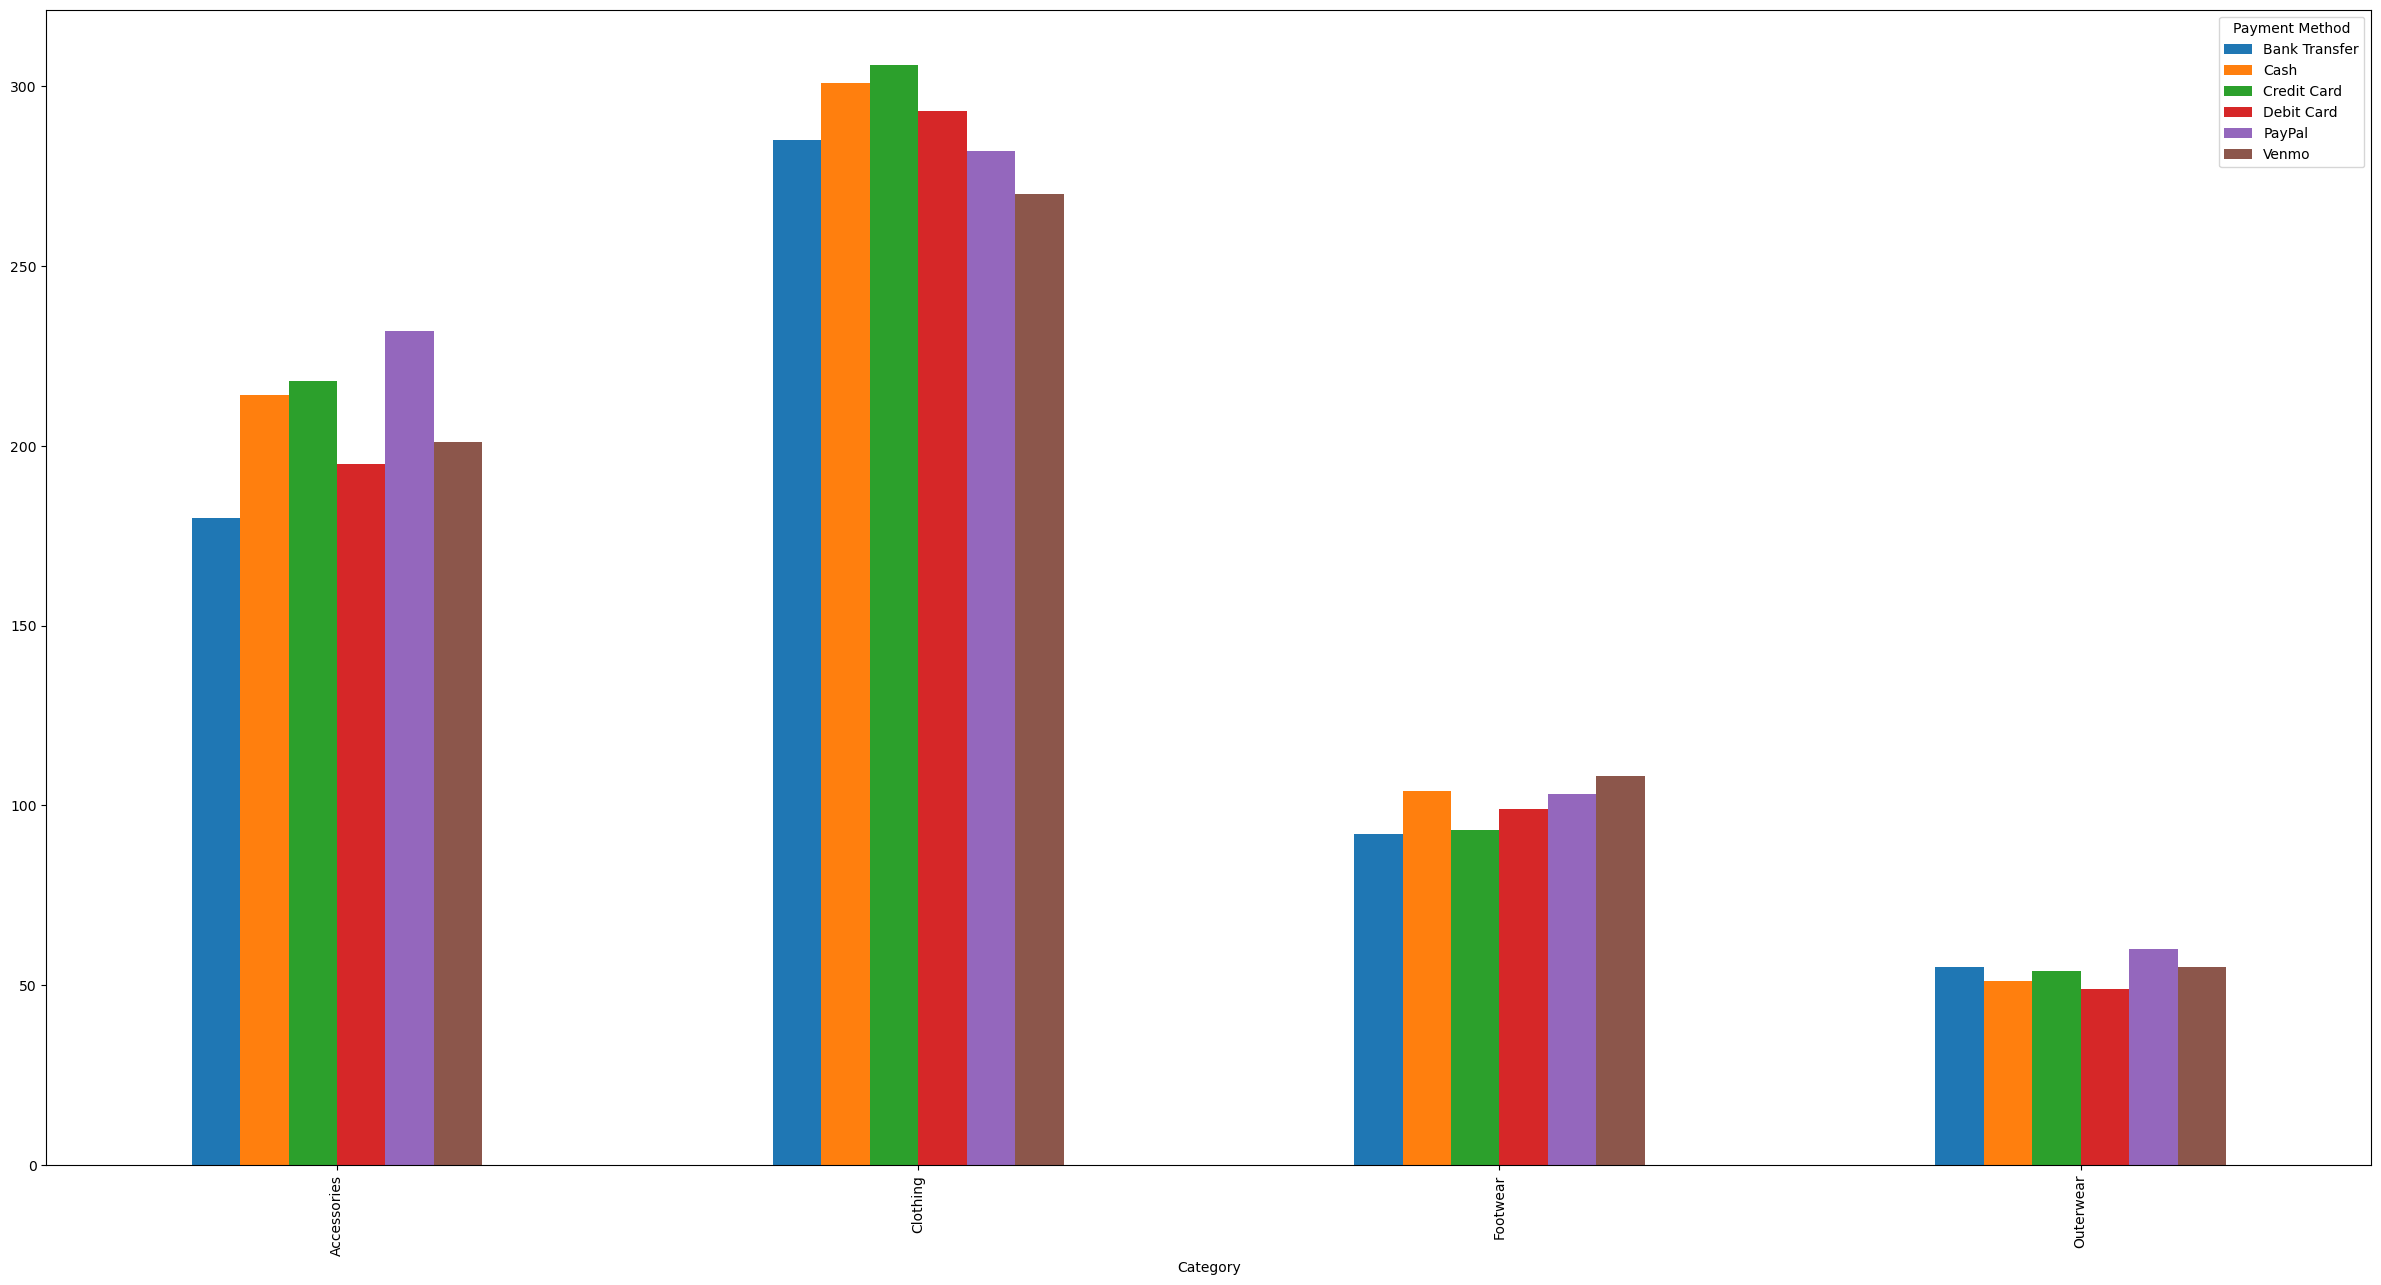

In [195]:
print(df.plot(kind = "bar" , figsize = (30,15)))


# 4. What is the spending pattern of customers?
# Goal: Understand customer value.
# - Average spending
# - Total revenue
# - Spending by age group
# - Spending by gender

In [226]:
shopping_df['Purchase Amount (USD)'].describe()

count    3900.000000
mean       59.764359
std        23.685392
min        20.000000
25%        39.000000
50%        60.000000
75%        81.000000
max       100.000000
Name: Purchase Amount (USD), dtype: float64

# Total revenue

In [230]:
shopping_df['Purchase Amount (USD)'].sum()

np.int64(233081)

# Spending by age group

<Axes: xlabel='Age_group'>

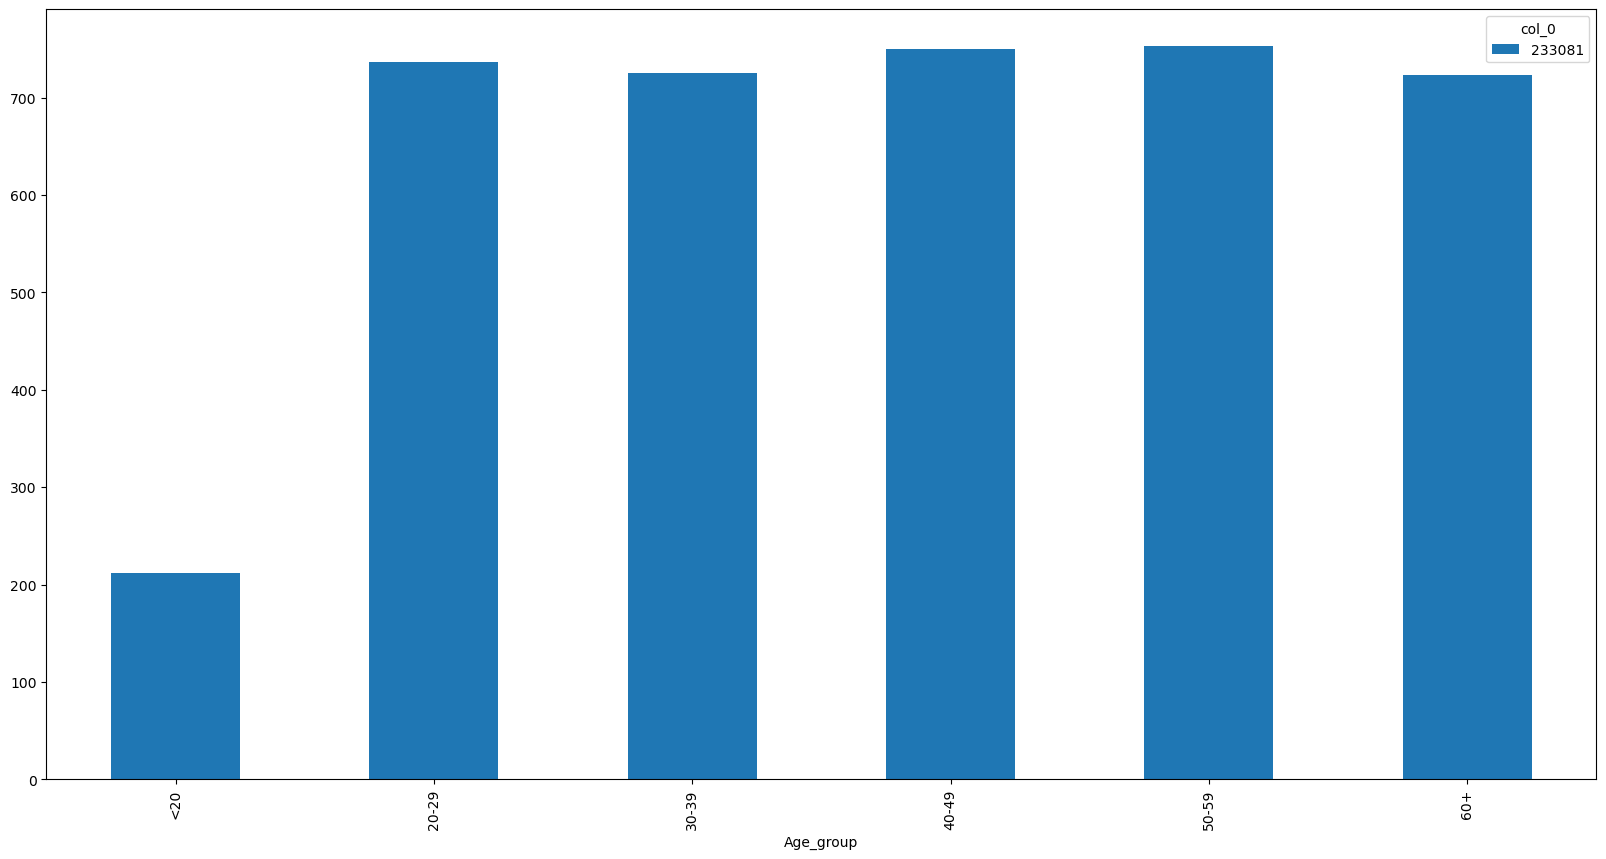

In [244]:
con1 = shopping_df['Age_group']
con2 = shopping_df['Purchase Amount (USD)'].sum()

df = pd.crosstab(con1 , con2)

df.plot(kind = "bar" , figsize = (20,10))

# Spending by gender

<Axes: xlabel='Gender'>

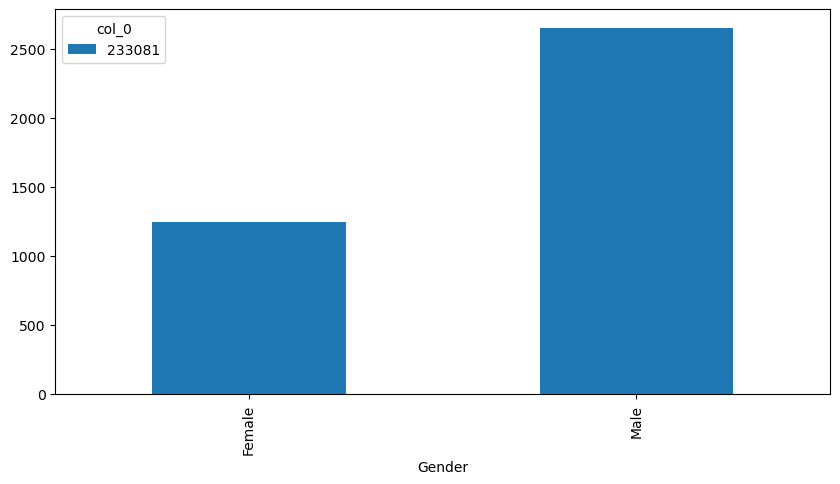

In [246]:
con1 = shopping_df['Gender']
con2 = shopping_df['Purchase Amount (USD)'].sum()

df = pd.crosstab(con1 , con2)

df.plot(kind = "bar" , figsize = (10,5))

<Axes: xlabel='Gender'>

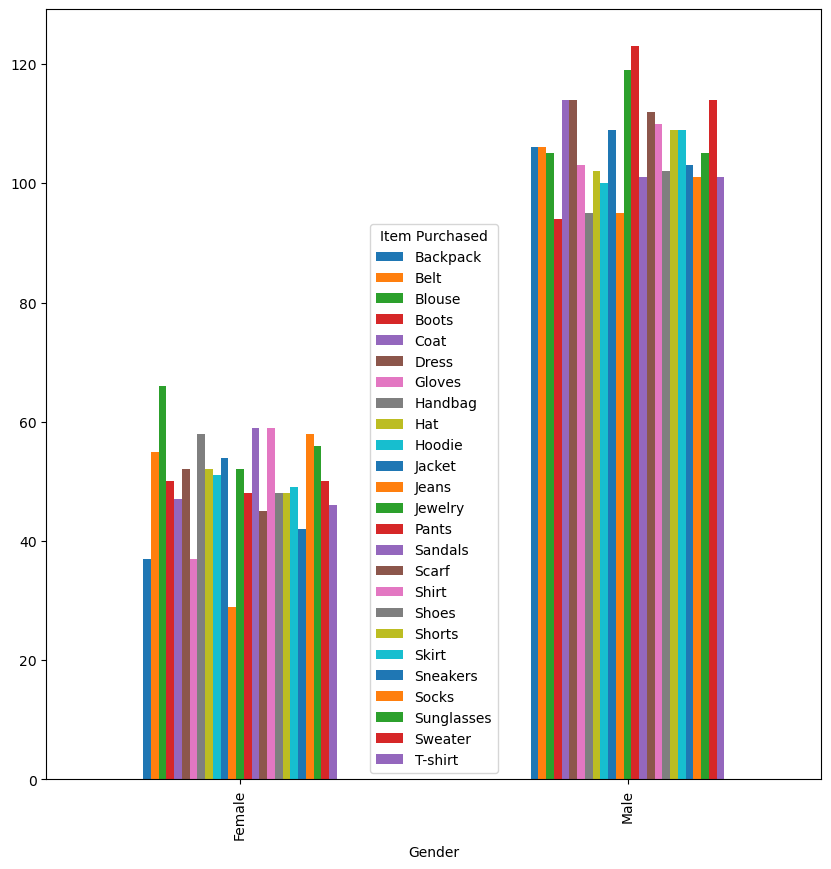

In [272]:
con1 = shopping_df['Gender']
con2 = shopping_df['Item Purchased']

df = pd.crosstab(con1 , con2)
df.plot(kind = "bar"    ,figsize = (10,10))

In [301]:
all_gender = shopping_df['Gender'].unique()

con1 = shopping_df['Gender']
con2 = shopping_df['Item Purchased']

df = pd.crosstab(con2,con1)

for i in all_gender:
    maximum = max(df[i])
    
    minimum = min(df[i])
    
    print(f"maximum = {i} = {df[i].idxmax()} : {maximum}")
    
    print(f"minimum = {i} = {df[i].idxmin()} : {minimum}")


maximum = Male = Pants : 123
minimum = Male = Boots : 94
maximum = Female = Blouse : 66
minimum = Female = Jeans : 29


# 5. What is the churn behavior? (Subscription Status)
# Goal: Identify groups with high churn.
# - Total unsubscribed customers
# - Churn by Age Group
# - Churn by Category
# - Churn by Gender

# Total unsubscribed customers

In [310]:
shopping_df['Subscription Status'].value_counts()

Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64

# Churn by Age Group

Subscription Status,No,Yes
Age_group,,
<20,157,55
20-29,543,194
30-39,533,192
40-49,541,209
50-59,545,208
60+,528,195


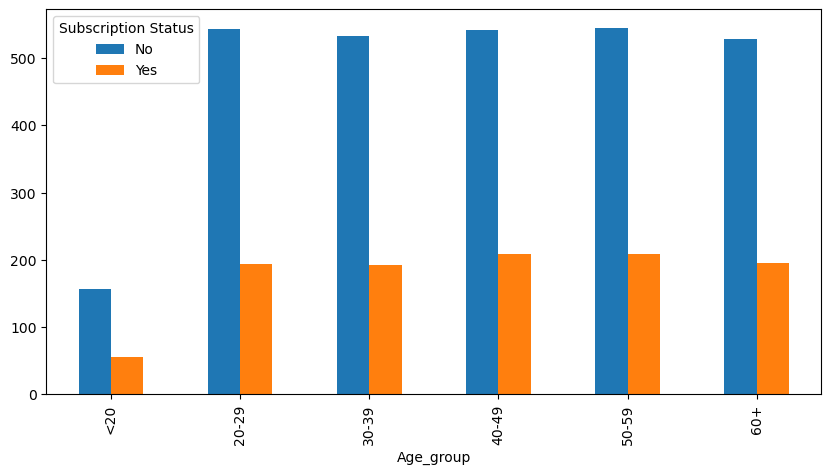

In [323]:
con1 = shopping_df['Age_group'] 
con2 = shopping_df['Subscription Status']


df = pd.crosstab(con1 , con2 )

df.plot(kind = "bar" , figsize = (10,5))
df



# Churn by Category

Subscription Status,No,Yes
Category,,
Accessories,906,334
Clothing,1280,457
Footwear,428,171
Outerwear,233,91


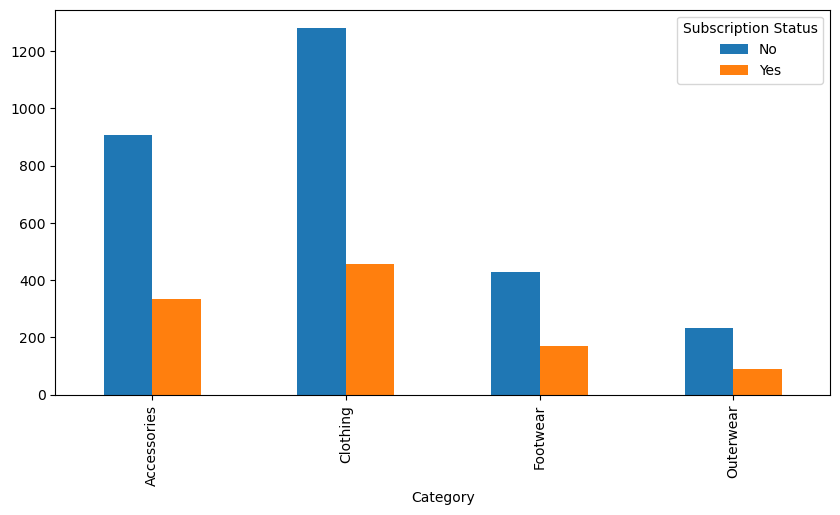

In [328]:
con1 = shopping_df['Category']
con2  = shopping_df['Subscription Status']

df = pd.crosstab(con1 , con2)
df.plot(kind = "bar" , figsize = (10,5))
df